## Nhập thư viện:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets as gds
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

c:\Users\ROCK\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


## Đọc dữ liệu:

In [2]:
df = pd.read_csv('../Datasets/data_cleaned.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually


## Phân tích nhân khẩu học:

### Lựa chọn thuộc tính:

- `Customer ID`: Xác định duy nhất mỗi khách hàng, giúp liên kết các thông tin khác với cá nhân cụ thể.
- `Age`: Tuổi của khách hàng là yếu tố cốt lõi trong việc phân khúc nhóm khách hàng theo các nhóm tuổi khác nhau.
- `Gender`: Giới tính giúp so sánh hành vi tiêu dùng giữa nam và nữ.
- `Location`: Thông tin về địa điểm cho phép phân tích theo vùng miền, thành phố hoặc khu vực, từ đó xác định các đặc điểm khu vực.
- `Subscription Status`: Mặc dù không phải trực tiếp là nhân khẩu học, nhưng trạng thái đăng ký có thể liên quan đến thói quen tiêu dùng và sự trung thành của khách hàng theo nhóm nhân khẩu học.

In [3]:
demographic_df = df[['Customer ID', 'Age', 'Gender', 'Location', 'Subscription Status']]
demographic_df.sample(5)

,Customer ID,Age,Gender,Location,Subscription Status
2996,2997,70,Female,Utah,No
1612,1613,18,Male,Wisconsin,No
988,989,50,Male,Ohio,Yes
2624,2625,19,Male,South Dakota,No
2321,2322,50,Male,Colorado,No


### Lựa chọn các biểu đồ:

#### Biểu đồ **tròn (pie chart)** để trực quan hóa tỷ lệ giữa khách hàng nam và khách hàng nữ:
- **Hiển thị tỷ lệ rõ ràng**: dễ dàng thấy được ngay tỷ lệ giữa 2 giới khách hàng.

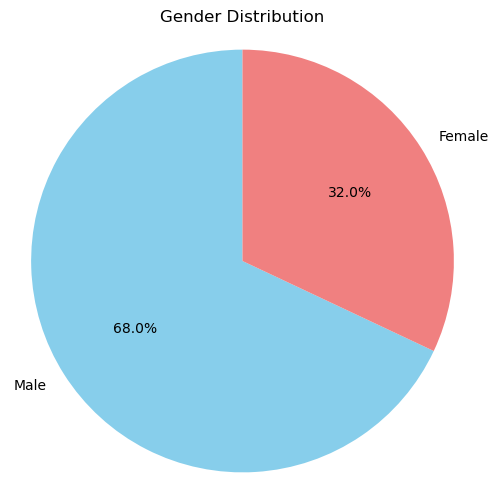

In [4]:
gender_counts = demographic_df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

##### Nhận xét từ biểu đồ tròn:
- Tỷ lệ khách hàng Nam và Nữ:
    - Nam (Male): Chiếm 68.0%.
    - Nữ (Female): Chiếm 32.0%.
    - Khách hàng nam chiếm tỷ lệ lớn hơn gấp đôi so với khách hàng nữ.
- Mất cân bằng giới tính:
    - Sự chênh lệch này cho thấy rằng doanh nghiệp đang tiếp cận được nhiều khách hàng nam hơn so với nữ.
- Khả năng nguyên nhân:
    - Sản phẩm/dịch vụ chủ yếu phục vụ nam giới.
    - Chiến dịch quảng cáo/Marketing không nhắm mục tiêu đủ đến khách hàng nữ.
    - Kênh bán hàng hoặc cách tiếp cận có thể phù hợp với nam hơn nữ.

##### Kết luận:
- Cần tìm hiểu thêm trong các phần tiếp theo để xem liệu rằng sản phẩm của doanh nghiệp dành cho nam nhiều hơn hay không, hay do chiến lược tiếp thị chưa thành công đối với tệp khách hàng nữ.
- Nếu sản phẩm được thiết kế chủ yếu cho nam, doanh nghiệp cần đánh giá lại chiến lược phát triển để không bỏ qua phân khúc khách hàng tiềm năng nữ.

#### Biểu đồ **Histogram** cho thuộc tính `Age`:
- **Trực quan phân bố độ tuổi**: Histogram cho phép nhìn thấy cách các độ tuổi được phân bố, xác định các nhóm tuổi phổ biến, khoảng cách, cũng như các điểm bất thường (outliers).
- **Đơn giản và hiệu quả**: Với biểu đồ này ta có thể dễ dàng trực quan hóa mật độ dữ liệu theo từng khoảng tuổi, từ đó hỗ trợ phân tích nhân khẩu học.

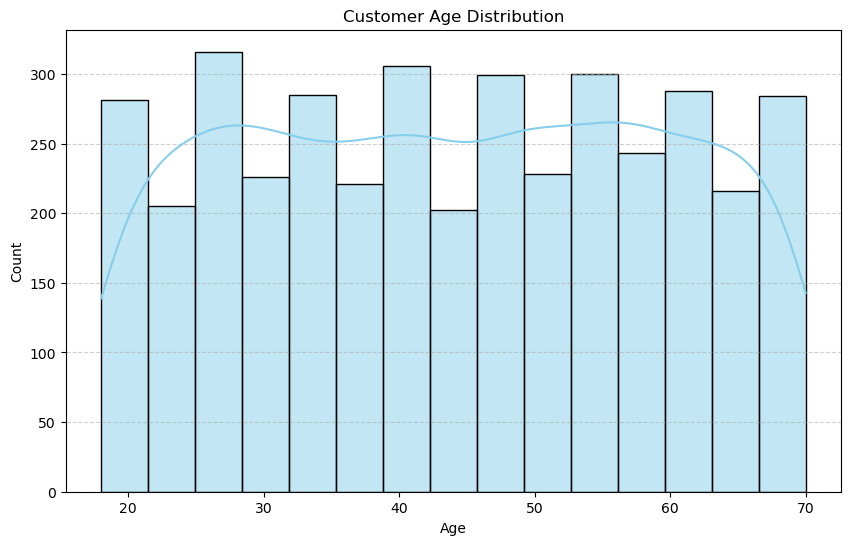

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(demographic_df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### Nhận xét:
Dựa trên biểu đồ histogram và đường cong mật độ KDE cho thấy:

- Phân bố khá đồng đều:
    - Mức độ tập trung ở các nhóm tuổi không chênh lệch quá lớn, chứng tỏ khách hàng trải dài trên nhiều độ tuổi.
    - Một số khoảng tuổi có số lượng nhỉnh hơn (có thể quan sát khoảng 30-40), tuy nhiên sự chênh lệch không quá rõ rệt.

- Không có cực trị (outlier) quá rõ:
    - Biểu đồ không xuất hiện những cột cực kỳ thấp hoặc cực kỳ cao, cho thấy phân bố khách hàng về tuổi khá “tròn trịa” và ổn định.

- Đường cong mật độ (KDE) “gợn sóng” nhẹ:
    - Dễ thấy rằng đường cong có dao động, nhưng nhìn chung không có đỉnh hay đáy đột biến, củng cố quan sát rằng dữ liệu về tuổi không tập trung quá nhiều vào một nhóm duy nhất.

- Hàm ý cho việc phân khúc thị trường:
    - Do không có nhóm tuổi vượt trội, chiến lược marketing hoặc xây dựng gói dịch vụ cần xem xét đến đa dạng độ tuổi.
    - Có thể cần kết hợp thêm các thuộc tính khác (giới tính, vị trí địa lý, sở thích) để phân khúc chính xác hơn.

##### Mở rộng: Tìm hiểu từng độ tuổi phân bố như thế nào ở từng giới tính.

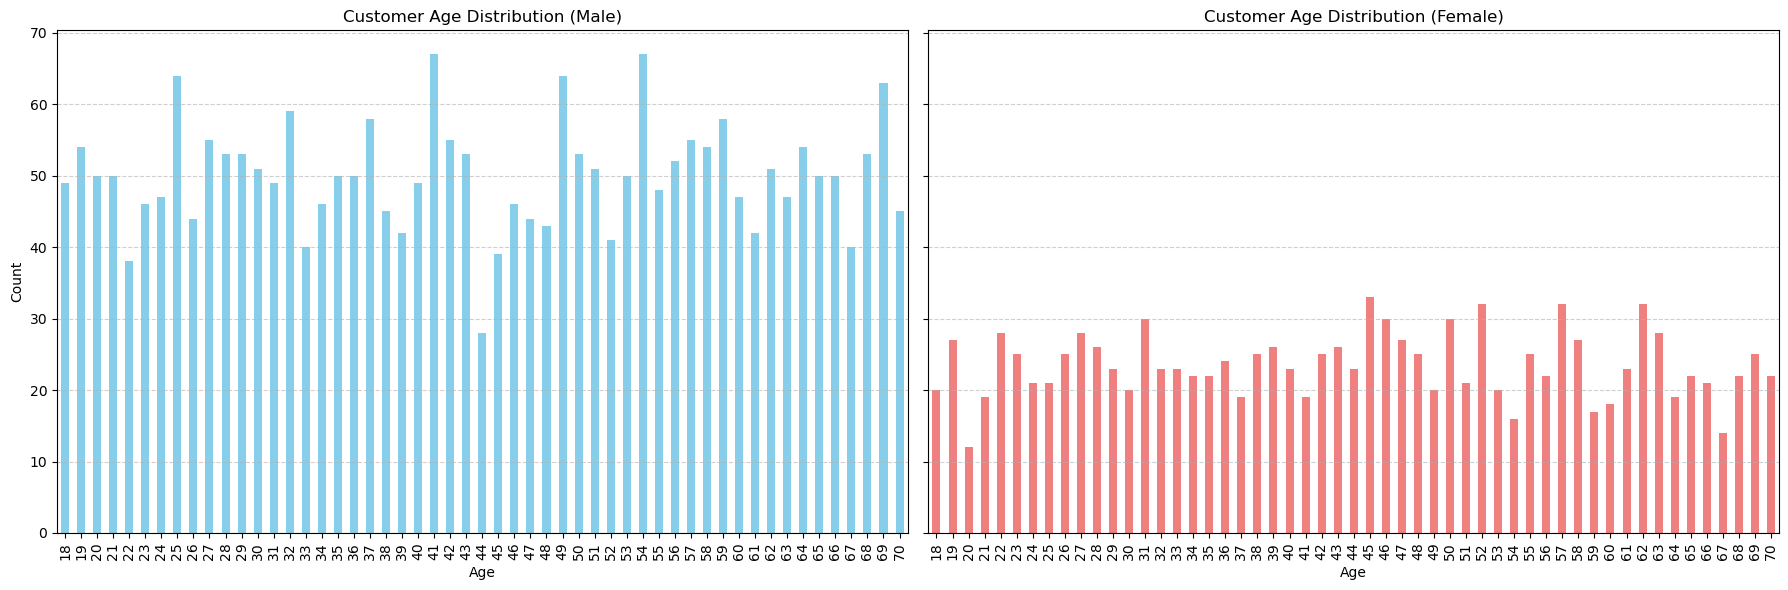

In [6]:
# Đếm số lượng khách hàng ở từng độ tuổi của nam
male_age_counts = demographic_df[demographic_df['Gender'] == 'Male']['Age'].value_counts().sort_index()

# Đếm số lượng khách hàng ở từng độ tuổi của nữ
female_age_counts = demographic_df[demographic_df['Gender'] == 'Female']['Age'].value_counts().sort_index()

# Tạo figure và các axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Biểu đồ cột cho khách hàng nam
male_age_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Customer Age Distribution (Male)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Biểu đồ cột cho khách hàng nữ
female_age_counts.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Customer Age Distribution (Female)')
axes[1].set_xlabel('Age')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

##### Nhận xét:
- Số lượng khách hàng ở từng độ tuổi ở mỗi giới tính khá ngang nhau, chỉ chênh lệch một lượng nhỏ giữa các độ tuổi với nhau.
- Khách hàng nam:
    - Số lượng khách hàng 41 và 54 tuổi là cao nhất, ngoài ra khách hàng tuổi 25, 49 và 69 cũng chiếm số lượng nổi trội.
    - Có chưa tới 30 khách hàng tuổi 44, bên cạnh đó độ tuổi 22 và 45 đều chưa đạt 40 khách hàng.
- Khách hàng nữ:
    - Trong khi số lượng khách hàng nam ở tuổi 45 ít hơn so với đa số thì ở tệp khách hàng nữ chứng kiến sự ngược lại, đây là độ tuổi của nhiều khách hàng nữ nhất.
    - Có chưa tới 15 khách hàng nữ ở độ tuổi 20 và 67.

##### Kết luận: 
- Dữ liệu tuổi khách hàng khá cân bằng trên nhiều độ tuổi, không tập trung hẳn vào một nhóm cụ thể. Điều này gợi ý rằng doanh nghiệp có tệp khách hàng rộng về độ tuổi, cần phân tích kết hợp các yếu tố khác để phân nhóm, điều chỉnh sản phẩm và chiến lược tiếp thị phù hợp.

#### Biểu đồ **cột (bar chart)** theo nhóm để phân tích mối quan hệ giữa hai thuộc tính `Gender` và `Subscription Status`:
- **Dễ so sánh**: Biểu đồ cột giúp so sánh số lượng khách hàng nam/nữ có trạng thái đăng ký khác nhau (đã đăng ký, chưa đăng ký).
- **Phân nhóm trực quan**: Nhờ vào cách biểu diễn theo nhóm (hue), có thể quan sát ngay được xu hướng đăng ký ở từng nhóm giới tính.
- **Đơn giản, trực quan**: Rất phù hợp để hiển thị dữ liệu phân loại (categorical data) và so sánh tần suất.

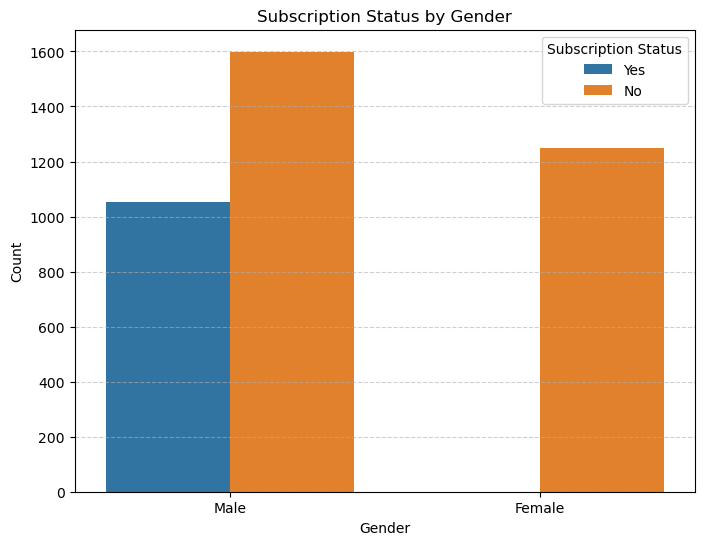

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=demographic_df, x='Gender', hue='Subscription Status')

plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Subscription Status')
plt.show()

##### Nhận xét:
- Số lượng khách hàng Nam nhiều hơn Nữ.
- Khách hàng Nam tồn tại cả 2 trạng thái Đăng ký & Không đăng ký, trong khi đó tất cả khách hàng Nữ đều không đăng ký.
- Đối với khách hàng Nam, số lượng người không đăng ký vượt trội hơn số người đăng ký.

##### Kết luận:
- Ngoài việc số lượng người không đăng ký cao hơn rõ rệt thì việc không có khách hàng nữ nào đăng ký cũng là một điểm đáng chú ý. Điều này cho thấy chiến lược thất bại của doanh nghiệp trong việc thu hút khách hàng (đặc biệt là nữ).
- Để đưa ra các chiến lược trong tương lai, cần xác thực lại dữ liệu và điều chỉnh, cải tiến để thu hút, thúc đẩy đăng ký từ khách hàng.

#### Biểu đồ nhiệt (heatmap) để trực quan dữ liệu mua hàng ở từng bang và khu vực:
- **Sinh động**: Với thang đo số lượng bằng màu sắc và dữ liệu mua hàng được trực quan bằng bản đồ giúp cho việc quan sát và nhận xét rất dễ dàng.
- **Khả năng khoanh vùng**: Các vùng có màu tương tự nhau có thể được nhóm lại, từ đó đưa ra các chiến lược phù hợp.

In [8]:
# Đếm số lượng mua hàng ở từng bang
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']
location_counts.sample(5)

,Location,Count
36,Michigan,73
27,Texas,77
10,Delaware,86
42,South Dakota,70
49,Rhode Island,63


In [9]:
# Tải bản đồ nước Mỹ
usa = gpd.read_file('../Datasets/110m_cultural/ne_110m_admin_0_countries.shp')
usa = usa[usa['ADMIN'] == 'United States of America']

In [10]:
# Tạo GeoDataFrame từ dữ liệu mua hàng
states = gpd.read_file('../Datasets/110m_cultural/ne_110m_admin_1_states_provinces.shp')
states = states[states['admin'] == 'United States of America']

In [11]:
# Merge dữ liệu mua hàng với bản đồ các bang
merged = states.set_index('name').join(location_counts.set_index('Location'))
merged.sample(3)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name_alt,name_local,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,Count
name,,,,,,,,,,,,,,,,,,,,,
Montana,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,MT|Mont.,None,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00...",96.0
California,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,CA|Calif.,None,...,None,None,None,None,None,None,None,None,"POLYGON ((-114.64222 35.05311, -114.62212 34.9...",95.0
Nebraska,Admin-1 scale rank,2,USA-3532,3532,US-NE,http://en.wikipedia.org/wiki/Nebraska,US,1,NE|Nebr.,None,...,None,None,None,None,None,None,None,None,"POLYGON ((-102.05017 40.00081, -102.05017 40.0...",87.0


In [12]:
# Reset index để chuyển cột 'name' từ index sang cột thông thường
merged = merged.reset_index()

# Thêm cột 'id' để dùng làm chỉ số cho việc map với GeoJSON
merged['id'] = merged.index

# Chuyển GeoDataFrame sang GeoJSON thông qua thuộc tính __geo_interface__
geojson = merged.__geo_interface__

# Tạo bản đồ tương tác bằng Plotly Express
fig = px.choropleth(
    merged,
    geojson=geojson,
    locations='id',                 # Dùng cột 'id' làm chỉ số định danh
    color='Count',                  # Cột số lượt mua hàng
    hover_name='name',              # Khi di chuột, hiển thị tên bang
    hover_data={'Count': True},     # Hiển thị số lượt mua
    scope='usa',                    # Giới hạn bản đồ chỉ vùng Mỹ
    color_continuous_scale='YlGn',
    labels={'Count': 'Number of purchases'}
)

# Cập nhật các thuộc tính bản đồ
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_text='Number of Purchases by State',
    margin={"r":0, "t":50, "l":0, "b":0}
)

fig.show()

##### Nhận xét:
- Số lượt mua ở từng có sự khác biệt tương đối rõ giữa các bang ở Hoa Kỳ.
- Các bang phía Đông phần lớn dao động trong khoảng 60-80 lượt mua, cho thấy doanh nghiệp đang tiếp cận với chiến lược rộng rãi và phù hợp với khu vực này.
- Nửa còn lại có sự phân hóa cao hơn, **Kansas** là bang có ít đơn hàng nhất với 63 lượt mua, đối nghịch với đó là bang **Montana**, **Idaho** & **California** đều có trên 90 lượt mua.
- Còn lại là các bang với số lượt mua hàng tầm trung bình.

##### Kết luận:
- Doanh nghiệp đang triển khai kế hoạch khá ổn với thị trường Hoa Kỳ, số đơn hàng không chênh lệch nhiều ở các bang.
- Tiếp tục khai thác thị trường hàng đầu như **Montana**, **California**, **Idaho**, **Illinois**. Bên cạnh đó cần điều chỉnh, cải thiện kế hoạch tiếp cận mạnh hơn ở các bang chưa nổi bật như **Kansas**, **Arizona**, **Florida**,...

## Phân tích tương quan các thuộc tính:

### Lựa chọn thuộc tính:

- Mục đích của phần này là khám phá mối quan hệ giữa các thuộc tính của bộ dữ liệu, do đó tất cả thuộc tính đều được chọn.

### Lựa chọn biểu đồ:

#### Biểu đồ **ma trận tương quan (Correlation Heatmap)** để trực quan mức độ tương quan giữa các biến số định lượng:
- Giúp nhận diện các cặp biến có mối liên hệ chặt chẽ và những biến có mối liên hệ yếu hoặc không liên quan.

In [13]:
# Chọn các thuộc tính định lượng
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df = numerical_df.drop('Customer ID', axis=1)
numerical_df.sample(3)

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
1667,51,40,3.4,24
1347,44,95,3.9,47
753,47,54,3.4,27


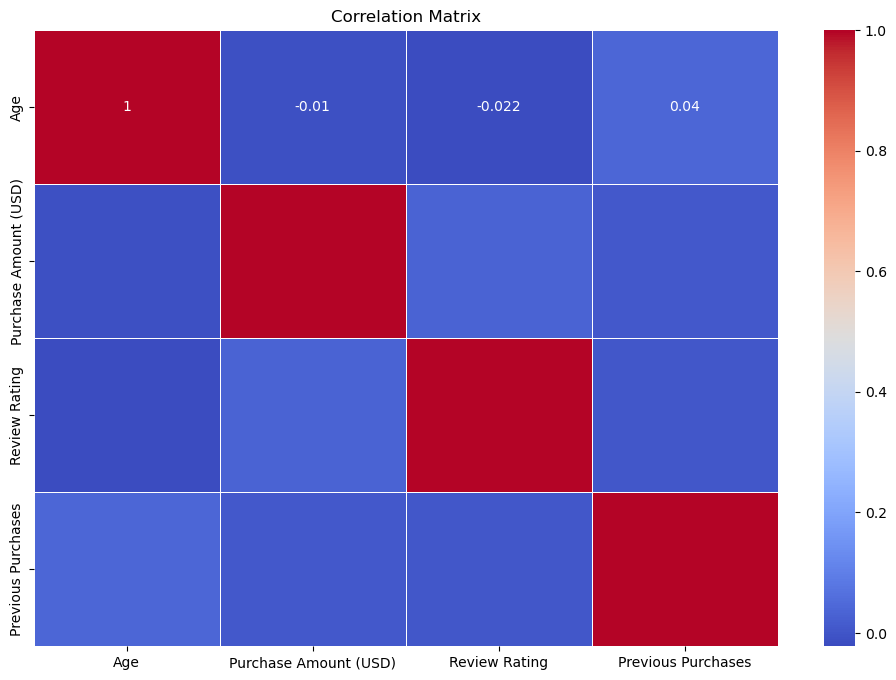

In [14]:
# Tính ma trận tương quan
correlation_matrix = numerical_df.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Nhận xét:
- Tất cả các hệ số tương quan chéo đều rất nhỏ (gần 0).
- Cả `Age` với `Purchase Amount (USD)`, `Review Rating` và `Previous Purchases` gần như không có mối quan hệ tuyến tính.

##### Kết luận:
- Các yếu tố như tuổi, số lần mua trước, đánh giá sản phẩm hay giá trị đơn hàng không tác động mạnh mẽ lẫn nhau, ít nhất là dưới góc độ tương quan tuyến tính.

#### Biểu đồ **Pairplot** để xem phân phối của từng biến định lượng và phát hiện mối quan hệ (như phi tuyến, cụm, outliers) giữa chúng:

- **Nhận biết nhanh các đặc điểm về phân phối**: trung bình, độ lệch, độ lệch chuẩn, outliers,…
- **Quan sát mối quan hệ giữa từng cặp biến**: Mỗi ô trong ma trận (trừ đường chéo) là một biểu đồ phân tán (scatter plot) giữa hai biến.

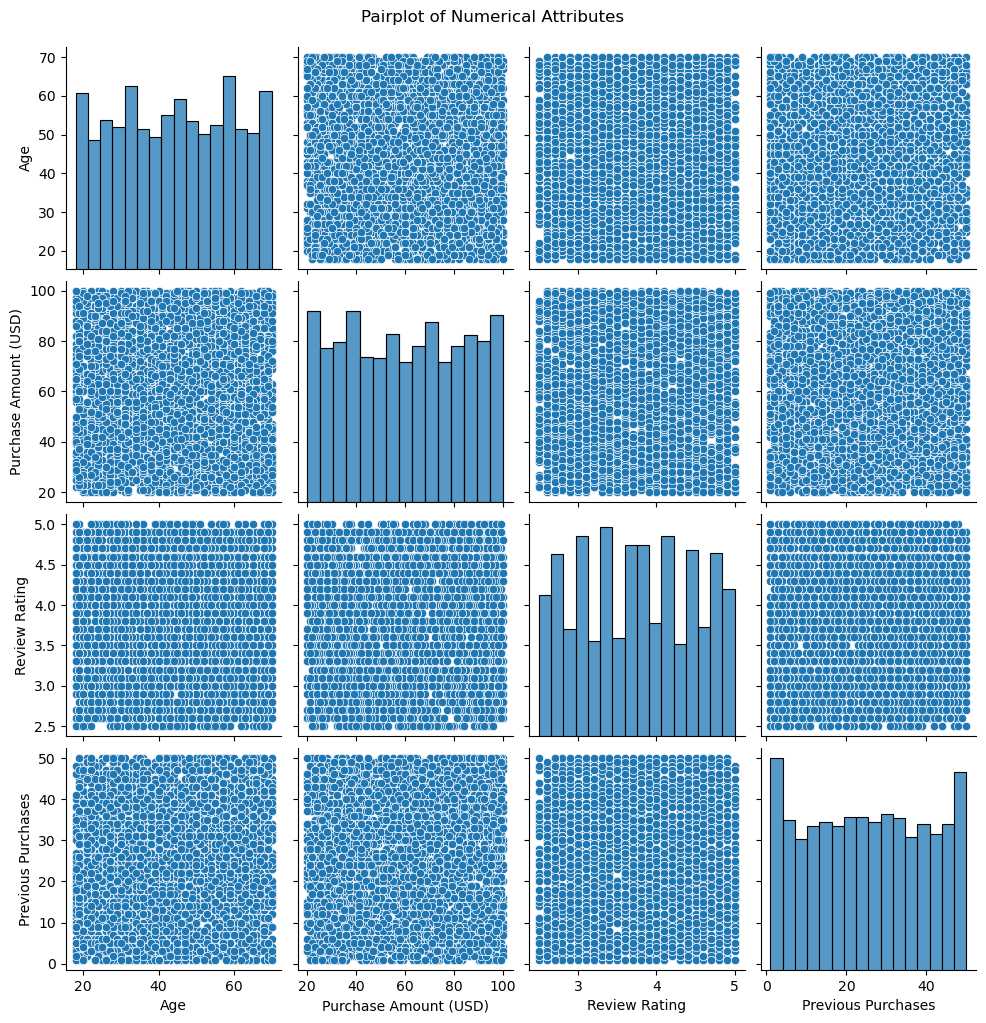

In [15]:
sns.pairplot(numerical_df)
plt.suptitle('Pairplot of Numerical Attributes', y=1.02)
plt.show()

##### Nhận xét:
- Phân phối của từng biến (trên đường chéo chính):
    - `Age`: dựa vào histogram, dữ liệu tuổi trải đều từ khoảng 10 đến 70, không có đỉnh nổi trội.
    - `Purchase Amount (USD)`: phân phối khá “phẳng” (trải rộng) trong khoảng 20–100 USD, không thấy dấu hiệu tập trung rõ ở một khoảng giá.
    - `Review Rating`: các đánh giá dao động từ 1 đến 5, phân bố có thể nghiêng nhẹ nhưng không quá rõ rệt.
    - `Previous Purchases`: Dữ liệu tập trung nhiều ở 2 đầu, nhưng vẫn rải đều ở các mức cao (20–40), cho thấy có một số khách hàng mua khá nhiều lần trước đó.
- Quan hệ giữa các cặp biến (các ô không thuộc đường chéo):
    - Các điểm dữ liệu rải ngẫu nhiên, không thành cụm, không theo đường thẳng hay cong.
    - Không quan sát thấy xu hướng tăng/giảm rõ rệt khi so sánh bất kỳ cặp biến nào.
    - Điều này phù hợp với việc ma trận tương quan gần như  bằng 0 (không có tương quan tuyến tính mạnh).
- Outliers và phân cụm:
    - Không nhận thấy cụm (cluster) rõ ràng, dữ liệu có vẻ phân tán rất đồng đều, không có nhóm tách biệt.
    - Không có dấu hiệu của outliers đặc biệt từ góc nhìn biểu đồ.

#### Biểu đồ **Boxplot** để so sánh phân phối của các biến định lượng theo các nhóm của biến phân loại:

- Hiển thị các số liệu thống kê như trung vị, khoảng tứ phân vị và các điểm ngoại lệ của mỗi nhóm.

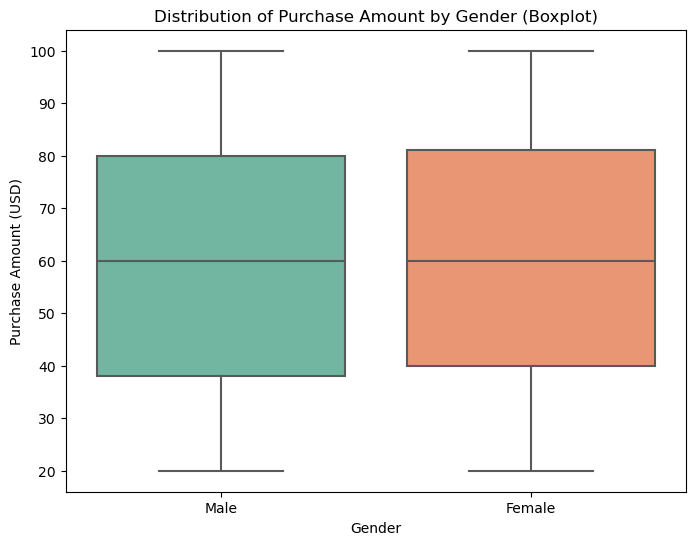

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)', palette='Set2')
plt.title('Distribution of Purchase Amount by Gender (Boxplot)')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

##### Nhận xét:
- Phân phối về giá trị đơn hàng được chi trả của khách hàng nam và nữ khá đồng đều nhau. Đa số đơn hàng tập trung từ 40 USD đến 80 USD, giá trị trung bình của các đơn hàng là 60 USD.

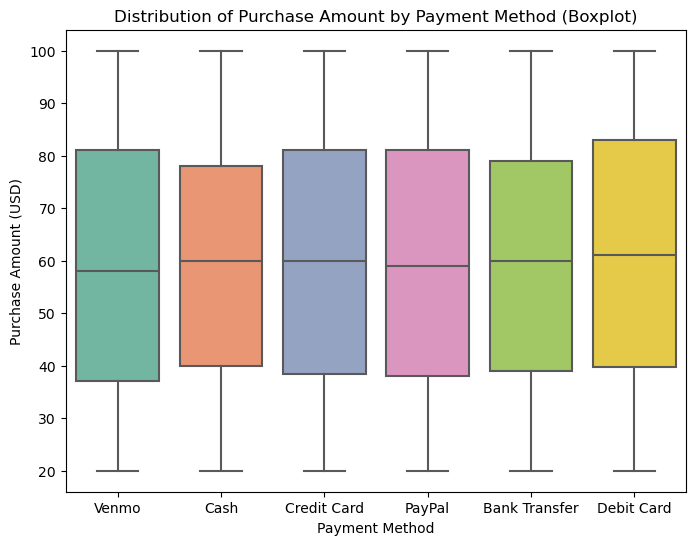

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Payment Method', y='Purchase Amount (USD)', palette='Set2')
plt.title('Distribution of Purchase Amount by Payment Method (Boxplot)')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.show()

##### Nhận xét:
- Phân phối về giá trị đơn hàng của các phương thức thanh toán cũng khá tương đồng.

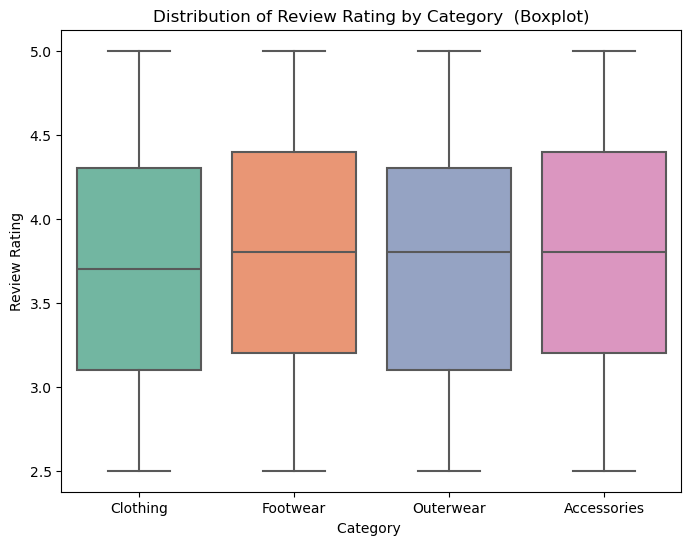

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Category', y='Review Rating', palette='Set2')
plt.title('Distribution of Review Rating by Category  (Boxplot)')
plt.xlabel('Category ')
plt.ylabel('Review Rating')
plt.show()

#### Nhận xét:
- Phân phối về đánh giá của từng loại sản phẩm không quá chênh lệch. Tất cả các loại sản phẩm phần lớn có được đánh giá ở mức trung bình (từ khoảng 3.1 đến 4.4).

## Phân tích Sở thích Phương thức thanh toán theo độ tuổi và Tần suất mua hàng

### Lựa chọn thuộc tính:

- `Age`: Tuổi của khách hàng là yếu tố cốt lõi trong việc phân khúc nhóm khách hàng theo các nhóm tuổi khác nhau.
- `Payment Method`: Phương thức thanh toán, để xác định sở thích của khách hàng về các phương thức thanh toán khác nhau.
- `Frequency of Purchases`: Tần suất mua hàng, để phân tích cách tần suất mua hàng ảnh hưởng đến sở thích phương thức thanh toán.

In [ ]:
demographic_df = df[[ 'Age', 'Payment Method', 'Frequency of Purchases']]
demographic_df.sample(5)

,Age,Payment Method,Frequency of Purchases
1667,51,Bank Transfer,Every 3 Months
3707,35,Venmo,Weekly
1542,59,PayPal,Weekly
432,47,Venmo,Weekly
904,69,PayPal,Every 3 Months


### Lựa chọn loại biểu đồ:

#### Biểu đồ **cột (bar chart)** phân tích sở thích phương thức thanh toán theo độ tuổi:
- **Dễ so sánh**: Biểu đồ cột giúp so sánh số lượng khách hàng sử dụng các phương thức thanh toán khác nhau theo từng nhóm tuổi.
- **Phân nhóm trực quan**: Nhờ vào cách biểu diễn theo nhóm (hue), có thể quan sát ngay được xu hướng sử dụng phương thức thanh toán ở từng nhóm tuổi.
- **Đơn giản, trực quan**: Rất phù hợp để hiển thị dữ liệu phân loại (categorical data) và so sánh tần suất.

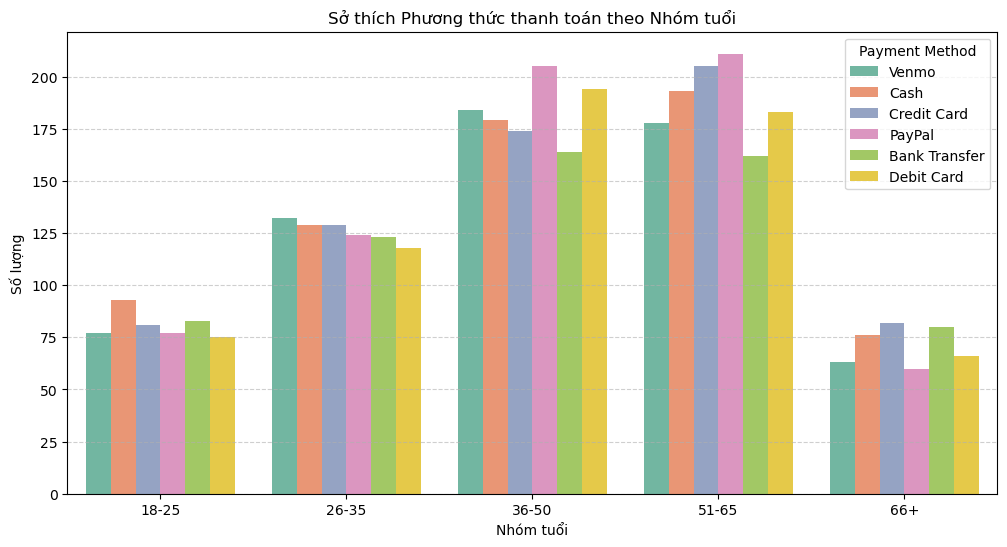

In [ ]:
# Tạo nhóm tuổi
bins = [18, 25, 35, 50, 65, 80]
labels = ['18-25', '26-35', '36-50', '51-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age Group', hue='Payment Method', palette='Set2')

plt.title('Sở thích Phương thức thanh toán theo Nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Payment Method')
plt.show()

##### Nhận xét biểu đồ: Sở thích Phương thức thanh toán theo Nhóm tuổi

Biểu đồ thể hiện sự lựa chọn các **phương thức thanh toán** theo **nhóm tuổi**:  
Các phương thức gồm: `Venmo`, `Cash`, `Credit Card`, `PayPal`, `Bank Transfer`, và `Debit Card`.

###### Nhóm tuổi 18-25:
- `Cash` là phương thức được ưa chuộng nhất (~95 lượt).
- Các phương thức còn lại dao động gần nhau (~75–85 lượt).
- Sở thích không quá nghiêng về một phương thức cụ thể → đa dạng nhưng phân tán.

###### Nhóm tuổi 26-35:
- Sự lựa chọn khá đồng đều giữa các phương thức (~120–135 lượt).
- `Venmo` được sử dụng nhiều nhất → người trẻ quen với các app thanh toán số.

###### Nhóm tuổi 36-50:
- Tăng mạnh về lượng chọn ở tất cả phương thức (~160–205 lượt).
- `PayPal` là phương thức được chọn nhiều nhất.
- `Debit Card` và `Venmo` cũng được sử dụng phổ biến → đây là nhóm tuổi sử dụng thanh toán điện tử mạnh nhất.

###### Nhóm tuổi 51-65:
- Là nhóm tuổi có tổng số lượt chọn cao nhất.
- `PayPal` và `Credit Card` dẫn đầu → độ tin cậy và phổ biến cao.
- `Cash` và `Debit Card` vẫn được dùng ở mức đáng kể.

###### Nhóm tuổi 66+:
- Số lượt chọn giảm mạnh so với các nhóm trước.
- `Credit Card` và `Bank Transfer` được ưu tiên → xu hướng chọn phương thức truyền thống, ổn định.
- `PayPal` và `Venmo` ít được chọn → không quen với công nghệ mới.

##### Kết luận:
1. **Nhóm tuổi trung niên (36–65)** sử dụng các phương thức thanh toán đa dạng và nhiều nhất.
2. **`PayPal` và `Credit Card`** là phương thức phổ biến nhất với nhóm người lớn tuổi.
3. **Người trẻ (18–35)** có xu hướng sử dụng các phương thức hiện đại như `Venmo` và `Cash`.
4. **Người lớn tuổi (66+)** ưa chuộng các phương thức truyền thống như `Credit Card` và `Bank Transfer`, ít sử dụng các công nghệ mới.
---


#### Biểu đồ **Heatmap** để phân tích sở thích phương thức thanh toán theo độ tuổi và tần suất mua hàng:
- **Sinh động**: Với thang đo số lượng bằng màu sắc giúp cho việc quan sát và nhận xét dễ dàng.
- **Khả năng khoanh vùng**: Các vùng có màu tương tự nhau có thể được nhóm lại, từ đó đưa ra các chiến lược phù hơp.

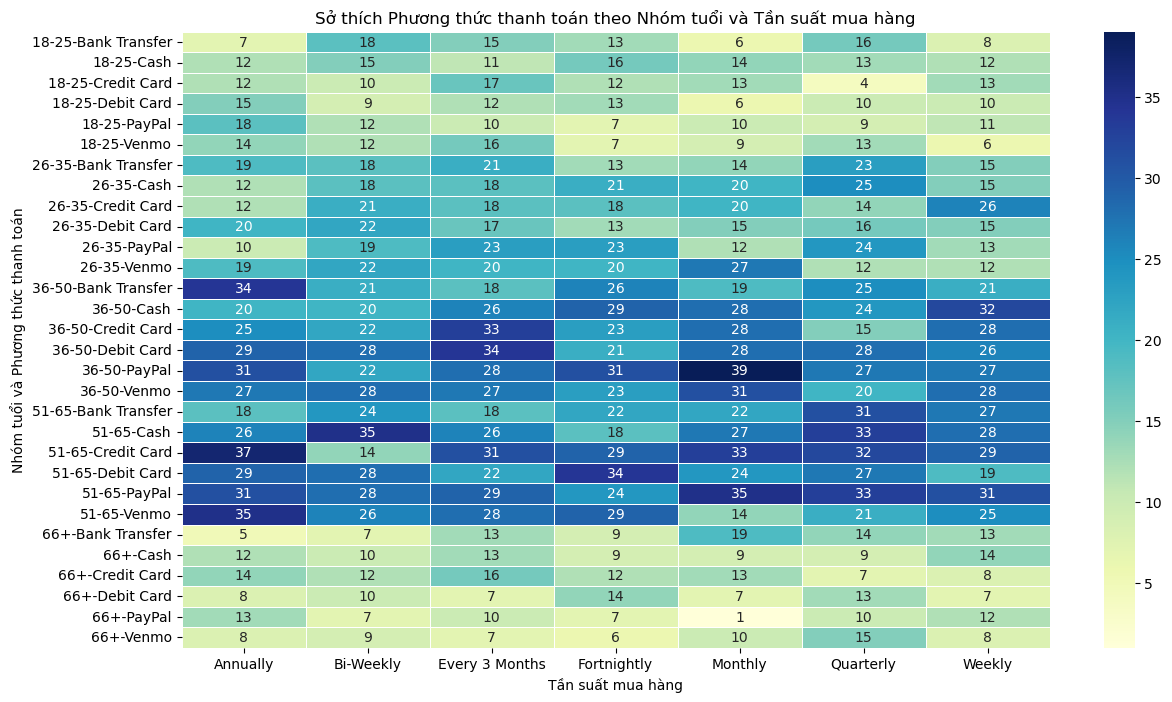

In [ ]:
# Tạo bảng đếm số lượng khách hàng theo nhóm tuổi, phương thức thanh toán và tần suất mua hàng
heatmap_data = pd.crosstab([df['Age Group'], df['Payment Method']], df['Frequency of Purchases'])

# Vẽ biểu đồ heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)

plt.title('Sở thích Phương thức thanh toán theo Nhóm tuổi và Tần suất mua hàng')
plt.xlabel('Tần suất mua hàng')
plt.ylabel('Nhóm tuổi và Phương thức thanh toán')
plt.show()

##### Nhận xét biểu đồ: Sở thích Phương thức thanh toán theo Nhóm tuổi và Tần suất mua hàng

Biểu đồ heatmap thể hiện mối quan hệ giữa **nhóm tuổi kết hợp với phương thức thanh toán** và **tần suất mua hàng**. Màu càng đậm thể hiện số lượng người chọn phương thức đó càng cao.

###### Nhóm tuổi 18-25:
- Số lượt chọn thấp nhất so với các nhóm tuổi khác.
- Mua hàng **bi-weekly** và **monthly** phổ biến hơn.
- `Venmo`, `Cash`, và `Credit Card` được sử dụng thường xuyên hơn các phương thức khác.

###### Nhóm tuổi 26-35:
- Số lượng chọn tăng rõ rệt so với nhóm 18-25.
- Các phương thức được sử dụng khá đồng đều.
- `Venmo` và `Debit Card` được dùng nhiều vào **bi-weekly** và **monthly**.
- Tần suất **weekly** và **fortnightly** có mức độ sử dụng cao.

###### Nhóm tuổi 36-50:
- Là nhóm có lượt chọn cao nhất ở hầu hết phương thức và tần suất.
- `PayPal`, `Debit Card` và `Bank Transfer` được sử dụng nổi bật.
- Mức sử dụng `PayPal` cao nhất vào **monthly** (39 lượt).
- `Credit Card` và `Cash` phổ biến ở tần suất **fortnightly** và **weekly**.

###### Nhóm tuổi 51-65:
- Tần suất sử dụng duy trì cao, gần tương đương với nhóm 36-50.
- `Credit Card`, `PayPal` và `Venmo` tiếp tục được dùng nhiều.
- `Cash` và `Debit Card` cũng có lượng chọn khá lớn ở **monthly** và **bi-weekly**.

###### Nhóm tuổi 66+:
- Lượt chọn giảm mạnh so với nhóm tuổi 36–65.
- Phổ biến nhất là `Credit Card` và `Cash`, chủ yếu ở các tần suất thấp như **quarterly** hoặc **annually**.
- Các phương thức hiện đại như `Venmo`, `PayPal`, `Debit Card` ít được sử dụng, đặc biệt ở tần suất cao.

##### Kết luận:

- **Nhóm tuổi 36-65** là đối tượng có **tần suất mua hàng thường xuyên nhất** và sử dụng **đa dạng phương thức thanh toán**, đặc biệt là `PayPal`, `Credit Card` và `Debit Card`.
- **Tần suất mua hàng phổ biến nhất** là **monthly** và **bi-weekly**, đặc biệt ở nhóm tuổi 26–65.
- **Người trẻ (18-35)** có xu hướng dùng `Venmo` và `Cash`, nhưng tần suất không quá cao.
- **Người lớn tuổi (66+)** ưa chuộng các phương thức truyền thống (`Credit Card`, `Cash`) và có **tần suất mua hàng thấp hơn** (chủ yếu là `quarterly` và `annually`).
- `PayPal` và `Debit Card` đạt mức sử dụng cao nhất trong nhóm trung niên, đặc biệt trong tần suất **monthly** và **fortnightly**.
---

#### Biểu đồ **Stacked Bar Chart** để phân tích sở thích phương thức thanh toán theo độ tuổi và tần suất mua hàng:
- **Dễ so sánh**: Biểu đồ cột chồng giúp so sánh mức độ phổ biến của các phương thức thanh toán trong mỗi nhóm tuổi, đồng thời thể hiện tỷ lệ tần suất mua hàng cho từng phương thức.
- **Phân nhóm trực quan**: Nhờ vào cách biểu diễn theo nhóm (hue), có thể quan sát ngay được xu hướng sử dụng phương thức thanh toán ở từng nhóm tuổi.
- **Đơn giản, trực quan**: Rất phù hợp để hiển thị dữ liệu phân loại (categorical data) và so sánh tần suất.

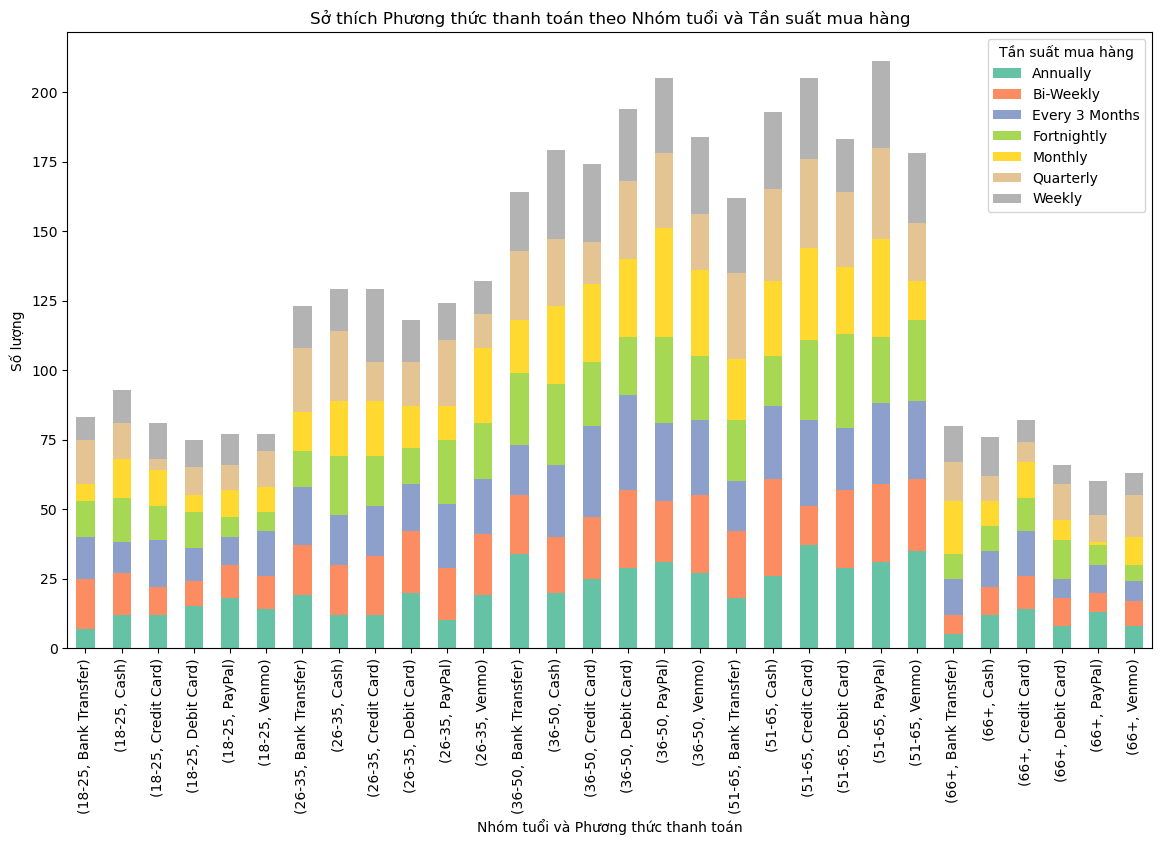

In [ ]:
# Tạo nhóm tuổi
bins = [18, 25, 35, 50, 65, 80]
labels = ['18-25', '26-35', '36-50', '51-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Tạo bảng đếm số lượng khách hàng theo nhóm tuổi, phương thức thanh toán và tần suất mua hàng
stacked_data = df.groupby(['Age Group', 'Payment Method', 'Frequency of Purchases']).size().unstack(fill_value=0)

# Vẽ biểu đồ cột chồng
stacked_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')
plt.title('Sở thích Phương thức thanh toán theo Nhóm tuổi và Tần suất mua hàng')
plt.xlabel('Nhóm tuổi và Phương thức thanh toán')
plt.ylabel('Số lượng')
plt.legend(title='Tần suất mua hàng')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Thêm lưới vào trục y
plt.show()

##### Nhận xét biểu đồ: Sở thích Phương thức thanh toán theo Nhóm tuổi và Tần suất mua hàng

Biểu đồ cột chồng thể hiện sự lựa chọn các **phương thức thanh toán** theo **nhóm tuổi** và **tần suất mua hàng**. Mỗi phần màu trong cột đại diện cho một tần suất mua hàng.

###### Nhóm tuổi 18-25
- `Cash` là phương thức được ưa chuộng nhất (~95 lượt).
- Các phương thức còn lại dao động gần nhau (~75–85 lượt).
- Sở thích không quá nghiêng về một phương thức cụ thể → đa dạng nhưng phân tán.

###### Nhóm tuổi 26-35
- Sự lựa chọn khá đồng đều giữa các phương thức (~120–135 lượt).
- `Venmo` được sử dụng nhiều nhất → người trẻ quen với các app thanh toán số.

###### Nhóm tuổi 36-50
- Tăng mạnh về lượng chọn ở tất cả phương thức (~160–205 lượt).
- `PayPal` là phương thức được chọn nhiều nhất.
- `Debit Card` và `Venmo` cũng được sử dụng phổ biến → đây là nhóm tuổi sử dụng thanh toán điện tử mạnh nhất.

###### Nhóm tuổi 51-65
- Là nhóm tuổi có tổng số lượt chọn cao nhất.
- `PayPal` và `Credit Card` dẫn đầu → độ tin cậy và phổ biến cao.
- `Cash` và `Debit Card` vẫn được dùng ở mức đáng kể.

###### Nhóm tuổi 66+
- Số lượt chọn giảm mạnh so với các nhóm trước.
- `Credit Card` và `Bank Transfer` được ưu tiên → xu hướng chọn phương thức truyền thống, ổn định.
- `PayPal` và `Venmo` ít được chọn → không quen với công nghệ mới.

##### Kết luận
1. **Nhóm tuổi trung niên (36–65)** sử dụng các phương thức thanh toán đa dạng và nhiều nhất.
2. **`PayPal` và `Credit Card`** là phương thức phổ biến nhất với nhóm người lớn tuổi.
3. **Người trẻ (18–35)** có xu hướng sử dụng các phương thức hiện đại như `Venmo` và `Cash`.
4. **Người lớn tuổi (66+)** ưa chuộng các phương thức truyền thống như `Credit Card` và `Bank Transfer`, ít sử dụng các công nghệ mới.
---


#### Biểu đồ Line Plot để phân tích xu hướng thay đổi tần suất sử dụng từng phương thức thanh toán theo độ tuổi

- **Sinh động**: Biểu đồ đường giúp thể hiện rõ xu hướng thay đổi của từng phương thức thanh toán theo từng nhóm tuổi.
- **Khả năng khoanh vùng**: Các đường có xu hướng tương tự nhau có thể được nhóm lại, hỗ trợ việc xác định các cụm hành vi tiêu dùng để đưa ra chiến lược phù hợp.


<Figure size 1400x800 with 0 Axes>

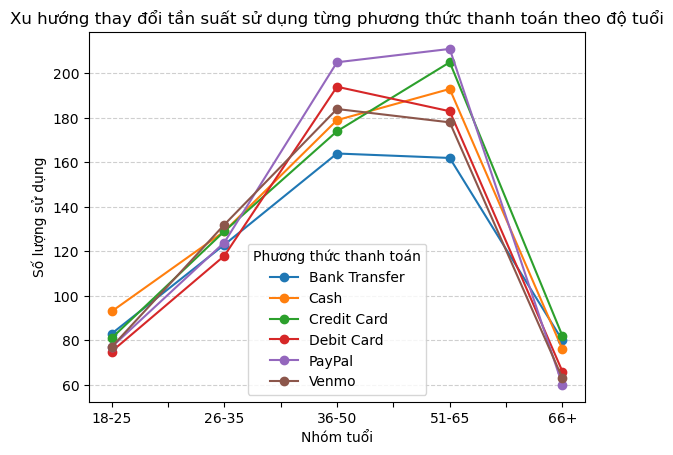

In [ ]:
# Tạo nhóm tuổi
bins = [18, 25, 35, 50, 65, 80]
labels = ['18-25', '26-35', '36-50', '51-65', '66+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Tạo bảng đếm số lượng khách hàng theo nhóm tuổi và phương thức thanh toán
line_data = df.groupby(['Age Group', 'Payment Method']).size().unstack().fillna(0)

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 8))
line_data.plot(kind='line', marker='o')

plt.title('Xu hướng thay đổi tần suất sử dụng từng phương thức thanh toán theo độ tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng sử dụng')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Phương thức thanh toán')
plt.show()

##### Nhận xét biểu đồ: Xu hướng thay đổi tần suất sử dụng từng phương thức thanh toán theo độ tuổi (Line Plot)

Biểu đồ đường thể hiện số lượng sử dụng các **phương thức thanh toán** theo từng **nhóm tuổi** từ 18-25 đến 66+.

###### Quan sát chung:
- Tất cả phương thức đều có xu hướng **tăng dần** từ nhóm tuổi trẻ đến trung niên, sau đó **giảm mạnh** ở nhóm tuổi 66+.
- Nhóm tuổi **36-65** là giai đoạn có lượng sử dụng cao nhất cho hầu hết phương thức.

###### Chi tiết từng phương thức:
- **PayPal**:
  - Tăng đều và đạt đỉnh ở nhóm **36-50**, sau đó giảm nhẹ ở 51-65 và giảm mạnh ở 66+.
  - Đây là phương thức được sử dụng nhiều nhất ở nhóm trung niên.

- **Credit Card**:
  - Xu hướng tăng mạnh và duy trì lượng dùng cao ở **51-65**, là phương thức ổn định và phổ biến nhất ở người lớn tuổi.

- **Venmo**:
  - Phổ biến từ 26–50 tuổi nhưng ít được dùng ở người trên 65 tuổi → phản ánh sự quen thuộc với công nghệ mới ở người trẻ.

- **Bank Transfer** và **Debit Card**:
  - Có xu hướng tương tự nhau: tăng dần theo tuổi đến nhóm trung niên, sau đó giảm.

- **Cash**:
  - Được dùng khá ổn định từ 18 đến 50 tuổi, tăng nhẹ ở 51-65 rồi giảm đáng kể ở 66+.

##### Kết luận:
1. Nhóm tuổi **36–65** là đối tượng sử dụng đa dạng và tích cực nhất các phương thức thanh toán.
2. **PayPal** và **Credit Card** là hai phương thức nổi bật trong nhóm trung niên.
3. **Người trẻ (18–25)** có xu hướng sử dụng **Venmo** và **Cash**, ít dùng các phương thức truyền thống như Bank Transfer.
4. **Người già (66+)** giảm đáng kể việc sử dụng mọi phương thức, đặc biệt là các phương thức hiện đại → cần hỗ trợ công nghệ nhiều hơn cho nhóm này.
---

##### Biểu đồ **Box Plot** để phân tích sự phân bố tần suất mua hàng theo phương thức thanh toán

- **Tổng quan phân phối**: Cho phép đánh giá mức độ phân tán, trung vị và các giá trị ngoại lệ trong tần suất sử dụng của từng phương thức thanh toán.
- **So sánh độ ổn định**: Dễ dàng nhận biết phương thức nào có mức sử dụng ổn định (hộp hẹp) và phương thức nào có sự biến động lớn giữa các nhóm người dùng (hộp rộng).
- **Phát hiện hành vi đặc biệt**: Các giá trị ngoại lệ (outliers) giúp phát hiện các hành vi mua sắm bất thường hoặc tần suất sử dụng cao đột biến ở một số nhóm người dùng.


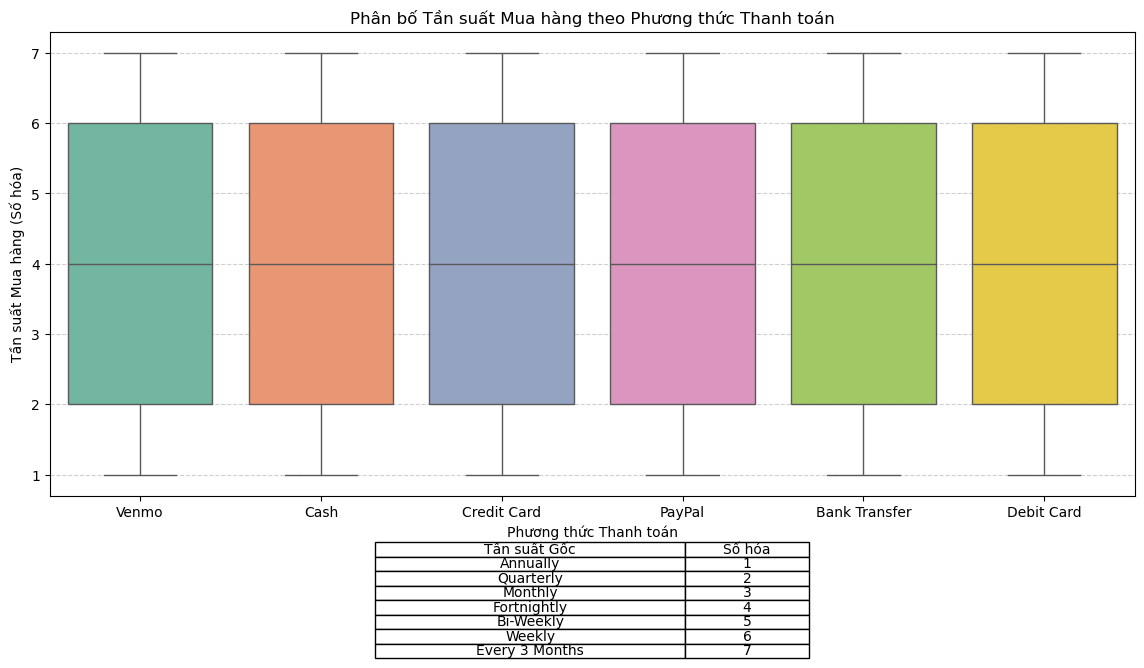

In [ ]:
# Chuyển đổi tần suất mua hàng thành dạng số hóa
frequency_mapping = {
    'Annually': 1,
    'Quarterly': 2,
    'Monthly': 3,
    'Fortnightly': 4,
    'Bi-Weekly': 5,
    'Weekly': 6,
    'Every 3 Months': 7
}
df['Frequency Numeric'] = df['Frequency of Purchases'].map(frequency_mapping)

# Vẽ biểu đồ box plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df, x='Payment Method', y='Frequency Numeric', palette='Set2', ax=ax)

# Cài đặt tiêu đề và nhãn
ax.set_title('Phân bố Tần suất Mua hàng theo Phương thức Thanh toán')
ax.set_xlabel('Phương thức Thanh toán')
ax.set_ylabel('Tần suất Mua hàng (Số hóa)')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Tạo bảng chú thích
table_data = [[k, v] for k, v in frequency_mapping.items()]
table = plt.table(cellText=table_data,
                  colLabels=['Tần suất Gốc', 'Số hóa'],
                  colWidths=[0.25, 0.1],
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.3, -0.35, 0.4, 0.25])  # điều chỉnh vị trí bảng

table.auto_set_font_size(False)
table.set_fontsize(10)

plt.subplots_adjust(bottom=0.3)  # Tăng lề dưới để không bị che
plt.show()

##### Biểu đồ Box Plot để phân tích sự phân bố tần suất mua hàng theo phương thức thanh toán

Biểu đồ hộp thể hiện sự **phân bố tần suất mua hàng** (đã được số hóa từ định tính) theo từng **phương thức thanh toán**.
 
###### Venmo:
  - Phân bố rộng, trung vị ở mức 4.
  - Có nhiều người dùng với tần suất rất thấp và rất cao → hành vi không ổn định.

###### Cash:
  - Phân bố ổn định, ít ngoại lệ.
  - Trung vị ở mức trung bình → phổ biến với tần suất vừa phải.

###### Credit Card:
  - Phân tán đồng đều, phổ biến từ mức 2 đến 6.
  - Là phương thức ổn định, ít ngoại lệ.

###### PayPal:
  - Phân bố tương tự Credit Card nhưng xuất hiện một số ngoại lệ ở tần suất rất thấp.

###### Bank Transfer:
  - Phân bố đều, không nổi bật về tần suất sử dụng.

###### Debit Card:
  - Tính ổn định cao nhất, hầu như không có ngoại lệ.
  - Cho thấy mức độ sử dụng đều đặn và phổ biến.

##### Kết luận:
1. **Trung vị tần suất mua hàng** tương đối giống nhau giữa các phương thức (ở mức Fortnightly).
2. **Debit Card** và **Credit Card** cho thấy tính ổn định cao hơn các phương thức còn lại.
3. **Venmo** và **PayPal** có mức độ phân tán cao hơn → hành vi người dùng đa dạng.
4. Doanh nghiệp có thể sử dụng thông tin này để đánh giá **tính phổ biến, ổn định và tiềm năng tăng trưởng** của từng phương thức thanh toán.


## Phân tích doanh thu của từng danh mục theo mùa

### Lựa chọn thuộc tính:

- `Category` – Danh mục sản phẩm (quần áo, điện tử, thực phẩm, v.v.)

- `Season` – Mùa (Xuân, Hạ, Thu, Đông)

- `Purchase Amount` (USD) – Tổng số tiền chi tiêu cho từng loại sản phẩm trong từng mùa

In [ ]:
# Hiển thị các giá trị duy nhất trong cột 'Category' dưới dạng danh sách
unique_categories_list = df['Category'].unique().tolist()
print(unique_categories_list)

demographic_df = df[['Category', 'Season', 'Purchase Amount (USD)']]
demographic_df.sample(10)

['Clothing', 'Footwear', 'Outerwear', 'Accessories']


,Category,Season,Purchase Amount (USD)
2309,Clothing,Fall,95
2377,Clothing,Fall,94
3818,Footwear,Winter,41
2409,Accessories,Spring,37
329,Clothing,Summer,31
458,Clothing,Winter,91
1109,Clothing,Winter,97
53,Clothing,Winter,24
3874,Clothing,Summer,54
2627,Clothing,Fall,26


### Lựa chọn các biểu đồ:

#### Biểu đồ cột **(Bar Chart)** - Số lượng mua hành theo mùa

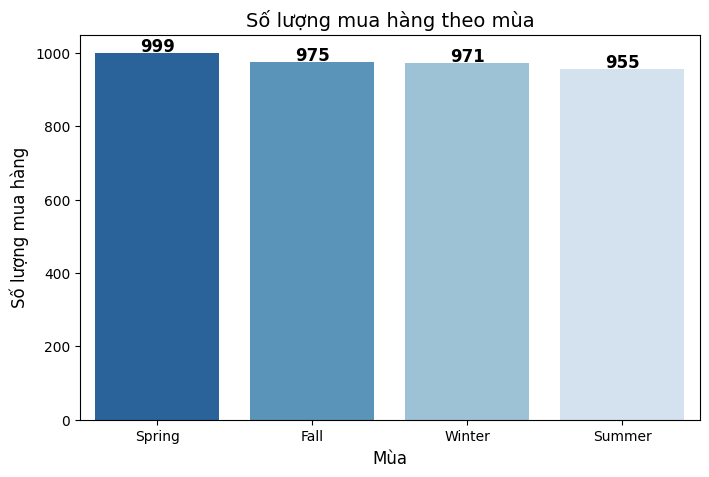

In [ ]:
# Đếm số lượng mua hàng theo mùa
season_count = df['Season'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=season_count.index, y=season_count.values, palette="Blues_r")

# Hiển thị số lượng trên đầu mỗi cột
for i, value in enumerate(season_count.values):
    plt.text(i, value + 5, str(value), ha='center', fontsize=12, fontweight='bold')

# Thiết lập tiêu đề và nhãn
plt.title("Số lượng mua hàng theo mùa", fontsize=14)
plt.xlabel("Mùa", fontsize=12)
plt.ylabel("Số lượng mua hàng", fontsize=12)

plt.show()

##### Nhận xét:
Dựa trên biểu đồ Bar và Line chart cho thấy:
- số lượng mua hàng theo mua không có sự chênh lệch lớn.
- Mùa Xuân cao nhất, cao hơn mùa thấp nhất là mùa hè 44 lượt.
##### Kết luận: 
- Có thể thấy rằng mùa xuân là mùa mua sắm mạnh nhất, có thể do các dịp lễ hội hoặc các chương trình khuyến mãi đặc biệt vào thời điểm này.
- Mùa hè có thể là thời điểm khách hàng ít mua sắm hơn, có thể do họ tập trung vào các hoạt động du lịch hoặc nghỉ ngơi.

#### Biểu đồ hộp **(boxplot)** - Giá trị mua hàng trung bình theo mùa

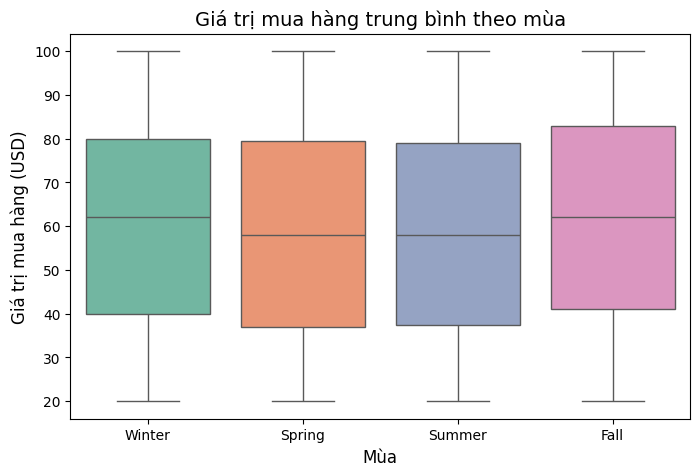

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Season", y="Purchase Amount (USD)", data=df, palette="Set2")
plt.title("Giá trị mua hàng trung bình theo mùa", fontsize=14)
plt.xlabel("Mùa", fontsize=12)
plt.ylabel("Giá trị mua hàng (USD)", fontsize=12)
plt.show()

##### Nhận xét:
Dựa trên biểu đồ Bar và Line chart cho thấy:
- Mùa thu (Fall) có giá trị mua hàng trung bình cao nhất, với trung vị cao nhất và phạm vi phân phối rộng nhất.
- Mùa đông (Winter) cũng có giá trị mua hàng trung bình khá cao, tương đương với mùa thu.
- Mùa xuân (Spring) và mùa hè (Summer) có giá trị mua hàng trung bình thấp hơn, với mùa hè có trung vị thấp nhất trong bốn mùa.
- Sự khác biệt về giá trị mua hàng trung bình giữa các mùa không quá lớn, nhưng vẫn có thể nhận thấy một số xu hướng.
##### Kết luận: 
- Tất cả các mùa đều có phạm vi phân phối giá trị mua hàng tương đối rộng, cho thấy sự biến động trong chi tiêu của khách hàng.
- Biểu đồ không hiển thị rõ ràng các giá trị ngoại lệ (outliers), nhưng phạm vi phân phối rộng cho thấy có thể có những giao dịch có giá trị mua hàng cao hoặc thấp bất thường.

#### Biểu đồ **Bar & Line Chart**:
- **Biểu đồ cột**: Giúp thể hiện rõ sự khác biệt về doanh thu của từng danh mục sản phẩm (Phụ kiện, Quần áo, Giày dép, Áo khoác) theo từng mùa.
- **Biểu đồ đường**: Hiển thị tổng doanh thu theo mùa, giúp quan sát xu hướng doanh thu tổng thể.
- Kết hợp hai loại biểu đồ giúp dễ dàng so sánh chi tiết từng danh mục với tổng thể, đồng thời nhận diện xu hướng doanh thu theo mùa.

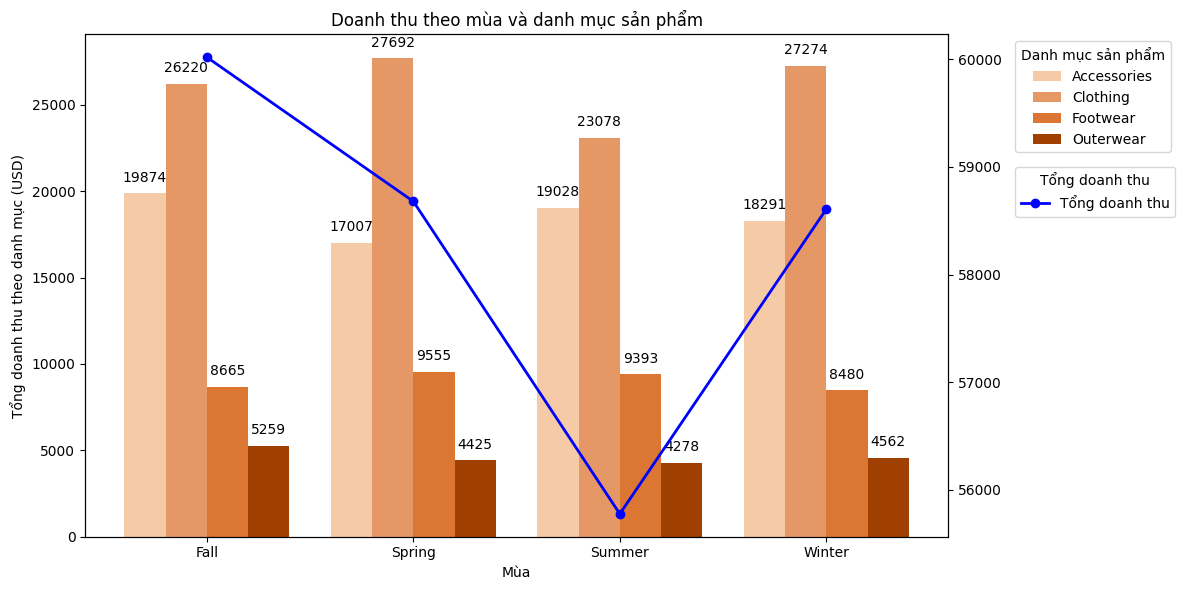

In [ ]:
# Nhóm dữ liệu theo Mùa và Danh mục sản phẩm
grouped_data = demographic_df.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)

# Tính tổng doanh thu theo mùa
total_revenue = demographic_df.groupby('Season')['Purchase Amount (USD)'].sum()

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(12, 6))

# Xác định vị trí cột trên trục x
mua = grouped_data.index
danh_muc = grouped_data.columns
x = np.arange(len(mua))  # Vị trí của từng mùa
width = 0.2  # Độ rộng của từng cột

# Danh sách màu sắc cho các danh mục sản phẩm
mau_sac = ['#F5CBA7', '#E59866', '#DC7633', '#A04000']

# Vẽ cột cho từng danh mục sản phẩm
for i, dm in enumerate(danh_muc):
    bars = ax1.bar(x + i * width, grouped_data[dm], width, label=dm, color=mau_sac[i])
    # Hiển thị số liệu trên từng cột, lùi lên một chút để tránh đè
    for bar in bars:
        cao = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, cao + 500, f'{int(cao)}', ha='center', va='bottom', fontsize=10)

# Vẽ đường tổng doanh thu
ax2 = ax1.twinx()
ax2.plot(x + width * 1.5, total_revenue.values, color='blue', marker='o', linestyle='-', linewidth=2, label='Tổng doanh thu')

# Thiết lập trục x và nhãn
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(mua)
ax1.set_xlabel("Mùa")
ax1.set_ylabel("Tổng doanh thu theo danh mục (USD)")
ax1.set_title("Doanh thu theo mùa và danh mục sản phẩm")

# Đưa chú thích ra ngoài biểu đồ
ax1.legend(title="Danh mục sản phẩm", bbox_to_anchor=(1.07, 1), loc="upper left")
ax2.legend(title="Tổng doanh thu", bbox_to_anchor=(1.07, 0.75), loc="upper left")

# Hiển thị biểu đồ
plt.tight_layout()  # Giúp bố cục gọn gàng hơn
plt.show()


##### Nhận xét:
Dựa trên biểu đồ Bar và Line chart cho thấy:

1. Doanh thu theo danh mục sản phẩm.

    Tập trung nhiều nhất vào `Clothing (Quần áo)` sau đó đến `Accessories (Phụ kiện)`, `Footwear (Giày dép)`, thấp nhất và có sự chênh lệnh lớn là `Outerwear (Áo khoác ngoài)`.
- Sự ảnh hưởng theo mùa: 
    - Doanh thu của từng danh mục qua các mùa có sự chênh lệch nhẹ. 
    - `Clothing (Quần áo)` cao nhất ở mùa đông và mùa xuân. Mùa hè doanh thu thấp nhất và có sự chênh lệch khá cao so với 2 mùa còn lại. Điều này cho thấy nhu cầu mua sắm quần áo tăng cao vào những thời điểm này, do thời tiết lạnh hơn. 
    - `Accessories (Phụ kiện)`: Danh mục này tương đối là ổn định, giảm nhẹ vào mùa xuân. 
    - `Footwear (Giày dép)`: Có sự chênh lệnh nhẹ, doanh thu cao hơn vào mùa xuân và mùa hè.
    - `Outerwear (Áo khoác ngoài)`: Trong khi đó 3 mua còn lại không có sự chênh lệch lớn thì mùa thu có doanh thu cao nhất, đầy là thời điểm điểm giao giữa mùa hạ và mùa đông. Người dùng có nhu cầu áo khoắc nhiều hơn cho sự giảm nhiệt độ và cũng để chuẩn bị bước sang thời tiết lạnh của mùa đông. 

2. Tổng doanh thu.

    Đường biển diễn tổng doanh thu cho thấy sự biến động rõ rệt theo mùa.

    - Mùa thu có tổng doanh thu cao nhất, cho thấy đây là mùa mua sắp chính. 
    - Mùa hạ có tổng doanh thu thấp nhất, có thể do thời tiết nóng ảnh hưởng tới nhu cầu và xu hướng mua sắm của người tiêu dùng. 
    - Mùa đông và mua xuân tương đối đồng đều về doanh thu. 

##### Kết luận: 
- Tính mùa vụ rõ rệt: Biểu đồ cho thấy tính mùa vụ ảnh hưởng lớn đến doanh thu, đặc biệt là đối với các mặt hàng quần áo và áo khoác ngoài.
- Quần áo là động lực chính: Danh mục quần áo đóng vai trò quan trọng trong việc thúc đẩy tổng doanh thu.
- Mùa Thu và mùa Đông là mùa mua sắm trọng điểm: Doanh nghiệp nên tập trung vào các chiến lược marketing và bán hàng trong hai mùa này để tối đa hóa doanh thu.
- Mùa Hạ là mùa thấp điểm: Doanh nghiệp cần có các biện pháp để kích cầu mua sắm trong mùa này, có thể thông qua các chương trình   khuyến mãi hoặc giảm giá.

## Phân tích doanh thu của từng sản phẩm trong danh mục Clothing (Quần áo)

### Lựa chọn thuộc tính:

- `Category` – Danh mục sản phẩm (quần áo, điện tử, thực phẩm, v.v.)

- `Item Purchased` – Sản phâm đã mua ( Shirt, Dress, Blouse, v.v.)

- `Purchase Amount` (USD) – Tổng số tiền chi tiêu cho từng loại sản phẩm trong từng mùa

In [ ]:
# Lọc dữ liệu chỉ lấy danh mục 'Clothing'
clothing_df = df[df['Category'] == 'Clothing']

demographic_df = clothing_df[['Item Purchased', 'Purchase Amount (USD)']]
demographic_df.sample(10)

,Item Purchased,Purchase Amount (USD)
0,Blouse,53
1967,Dress,81
1127,Shirt,53
2660,Pants,85
1051,Socks,53
3319,Shorts,31
3740,Pants,96
2573,T-shirt,90
721,Blouse,57
1190,Shirt,45


#### Biểu đồ **Horizontal bar chart**

- Trục tung (y-axis): Hiển thị tên của từng sản phẩm quần áo.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột ngang: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng sản phẩm.
- Màu sắc: Màu sắc đậm hơn cho thấy doanh thu cao hơn.

Biểu đồ cột ngang là một lựa chọn phù hợp để so sánh các giá trị giữa các danh mục, đặc biệt khi tên danh mục dài hoặc có nhiều danh mục cần so sánh

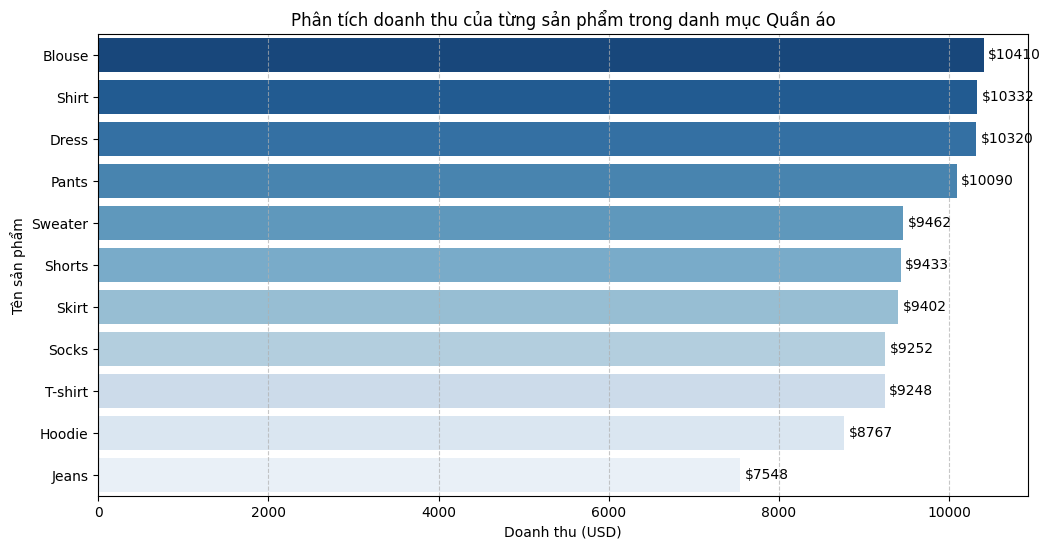

In [ ]:
# Tính tổng doanh thu theo từng sản phẩm trong danh mục Clothing
total_revenue = clothing_df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

# Lọc dữ liệu chỉ lấy danh mục 'Clothing'
clothing_df = df[df['Category'] == 'Clothing']

# Tính tổng doanh thu theo từng sản phẩm trong danh mục Clothing
total_revenue = clothing_df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
total_revenue = total_revenue.sort_values(by='Purchase Amount (USD)', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.barplot(data=total_revenue, x='Purchase Amount (USD)', y='Item Purchased', palette='Blues_r')
plt.xlabel('Doanh thu (USD)')
plt.ylabel('Tên sản phẩm')
plt.title('Phân tích doanh thu của từng sản phẩm trong danh mục Quần áo')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị giá trị cụ thể trên cột
for index, value in enumerate(total_revenue['Purchase Amount (USD)']):
    plt.text(value + 50, index, f'${int(value)}', va='center', fontsize=10)

plt.show()

##### Nhận xét:

Đây là biểu đồ về doanh thu của từng sản phẩm trong doanh mục Clothing (Quần áo). Danh mục  đóng vai trò quan trọng trong việc thúc đẩy tổng doanh thu.

Dựa trên biểu đồ cho thấy: 
- Sự phân hóa khá rõ rệt
    - Nhóm sản phẩm chiếm doanh thu cao (Blouse, Shirt, Dress). Cho thấy đây là nhưng mặt hàng được ưu chuộng hơn. 
    - Nhóm sản phẩm có doanh thu thấp là (Hoodie, jeans) đặc biệt là jeans, sản phẩm có sự chênh lệch khá gần $3000 so với top đầu.

- Mức chênh lệch
    - Quần dài (Pants) và Quần sooc (Shorts) có doanh thu khá tốt, trong khi quần jean (Jeans) lại có doanh thu thấp nhất.
    - Cùng với đó Áo len (Sweater) cũng có doanh thu ở mức trung bình, trong khi Hoodie lại có doanh thu thấp.
    
Mức chênh lệch thể hiện cho xu hướng thời trang hiện này.

##### Kết luận: 
1. Xu hướng thời trang ứng dụng:

    - Người tiêu dùng có xu hướng ưu tiên những sản phẩm thời trang có tính ứng dụng cao, dễ phối đồ và phù hợp với nhiều hoàn cảnh.
    - Các sản phẩm như áo sơ mi, váy và áo kiểu nữ đáp ứng tốt nhu cầu này.
2. Sự thay đổi trong sở thích về quần:
    - Xu hướng thời trang có thể ảnh hưởng đến doanh số bán hàng của các loại quần.
    - Doanh nghiệp cần theo dõi sát sao xu hướng này để điều chỉnh danh mục sản phẩm phù hợp.

## Phân tích doanh thu của từng sản phẩm trong danh mục Phụ kiện (Accessories)

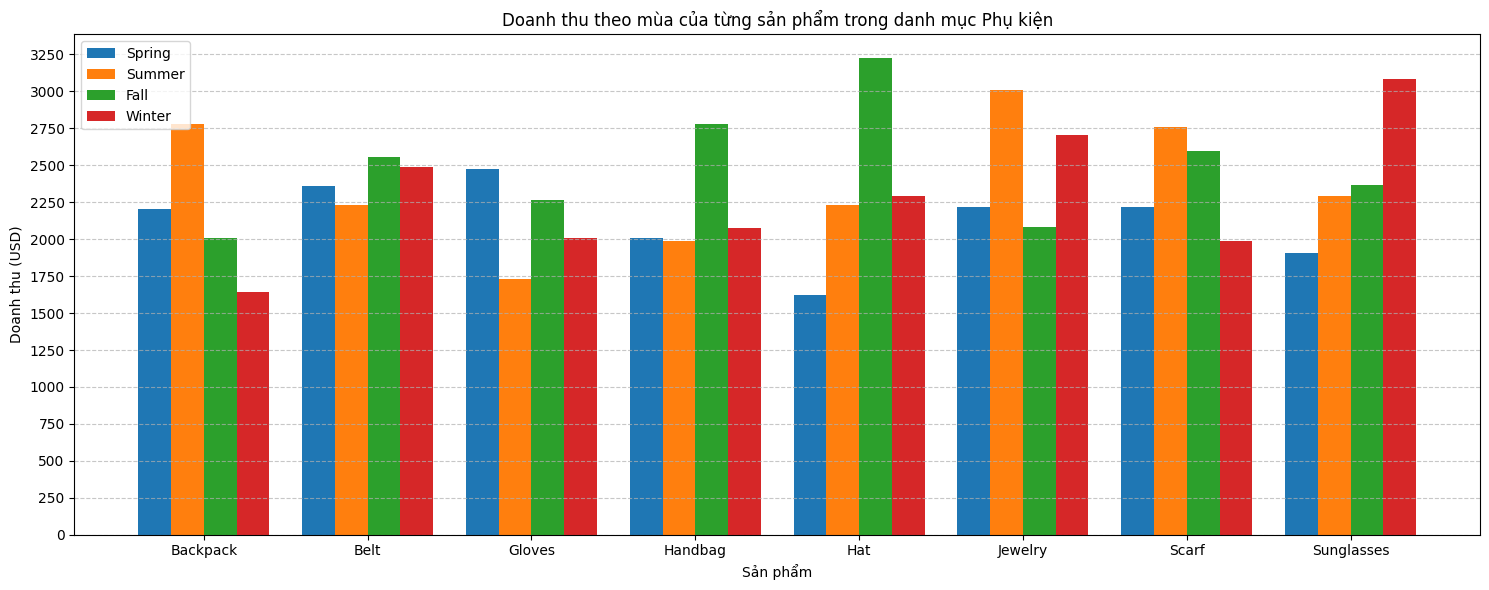

In [ ]:
accessories_df = df[df['Category'] == 'Accessories'][['Item Purchased', 'Season', 'Purchase Amount (USD)']]
accessories_products = accessories_df['Item Purchased'].unique()

seasonal_revenue = accessories_df.groupby(['Item Purchased', 'Season'])['Purchase Amount (USD)'].sum().reset_index()
seasonal_revenue['Season'] = pd.Categorical(
    seasonal_revenue['Season'],
    ['Spring', 'Summer', 'Fall', 'Winter'],
    ordered = True
)
seasonal_revenue = seasonal_revenue.sort_values(["Item Purchased", "Season"]).reset_index(drop = 1)
x = np.arange(len(accessories_products))

# Width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, seasonal_revenue[seasonal_revenue['Season'] == 'Spring']['Purchase Amount (USD)'], width, label = 'Spring')
ax.bar(x - width / 2, seasonal_revenue[seasonal_revenue['Season'] == 'Summer']['Purchase Amount (USD)'], width, label = 'Summer')
ax.bar(x + width / 2, seasonal_revenue[seasonal_revenue['Season'] == 'Fall']['Purchase Amount (USD)'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, seasonal_revenue[seasonal_revenue['Season'] == 'Winter']['Purchase Amount (USD)'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(seasonal_revenue['Item Purchased'].sort_values().unique())
ax.set_yticks(np.arange(0, 3500, 250))
ax.set_xlabel('Sản phẩm')
ax.set_ylabel('Doanh thu (USD)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Doanh thu theo mùa của từng sản phẩm trong danh mục Phụ kiện')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

#### Biểu đồ cột (Bar chart)
- Trục tung (y-axis): Hiển thị tên của từng sản phẩm phụ kiện.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng sản phẩm theo mùa, mỗi mùa được phân biệt bằng 1 màu khác nhau.

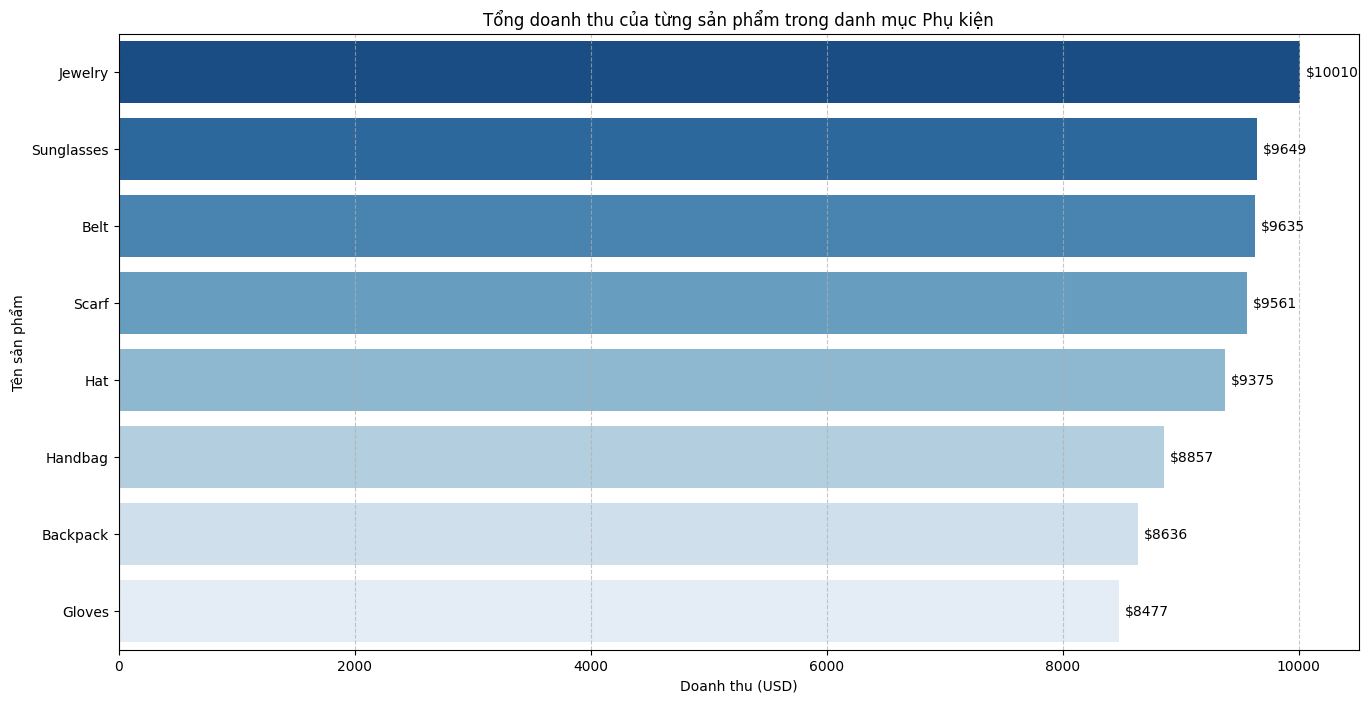

In [ ]:
total_revenue = accessories_df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()
total_revenue = total_revenue.sort_values(by = 'Purchase Amount (USD)', ascending = False)

# Vẽ biểu đồ
plt.figure(figsize = (16, 8))
sns.barplot(data = total_revenue, x = 'Purchase Amount (USD)', y = 'Item Purchased', palette = 'Blues_r')
plt.xlabel('Doanh thu (USD)')
plt.ylabel('Tên sản phẩm')
plt.title('Tổng doanh thu của từng sản phẩm trong danh mục Phụ kiện')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

# Hiển thị giá trị cụ thể trên cột
for index, value in enumerate(total_revenue['Purchase Amount (USD)']):
    plt.text(value + 50, index, f'${int(value)}', va = 'center', fontsize = 10)

plt.show()

#### Biểu đồ cột ngang (Horizontal bar chart)
- Trục tung (y-axis): Hiển thị tên của từng sản phẩm phụ kiện.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột ngang: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng sản phẩm.
- Màu sắc: Màu sắc đậm hơn cho thấy doanh thu cao hơn.

### Nhận xét hai biểu đồ
Hai sản phẩm mang lại doanh thu nhiều nhất theo từng mùa là:  
- __Mùa xuân:__ Găng tay (Gloves), Thắt lưng (Belt)  
- __Mùa hè:__ Trang sức (Jewelry), Ba lô (Backpack)  
- __Mùa thu:__ Nón (Hat), Túi xách (Handbag)  
- __Mùa đông:__ Kính râm (Sunglasses), Trang sức (Jewelry)  

Tuy nhiên, nếu so sánh về tổng doanh thu của cả bốn mùa, hai sản phẩm mang lại doanh thu nhiều nhất là:
- Trang sức (Jewelry)  
- Kính râm (Sunglasses)  

Găng tay tuy có doanh thu lớn nhất vào mùa xuân, nhưng lại là sản phẩm có tổng doanh thu thấp nhất ở đây. Điều này xảy ra có thể do nhu cầu giữ ấm cơ thể để có thể tiếp tục làm việc sau khi kết thúc Giáng sinh ở Mỹ.  
Doanh thu của các sản phẩm trong danh mục này có sự phân hóa nhất định, với chênh lệch doanh thu giữa hai sản phẩm chưa đến $\$1600.$ Điều này cho thấy sự ổn định của doanh thu đối với các mặt hàng phụ kiện.  

## Khảo sát doanh thu theo sự giảm giá của các mặt hàng

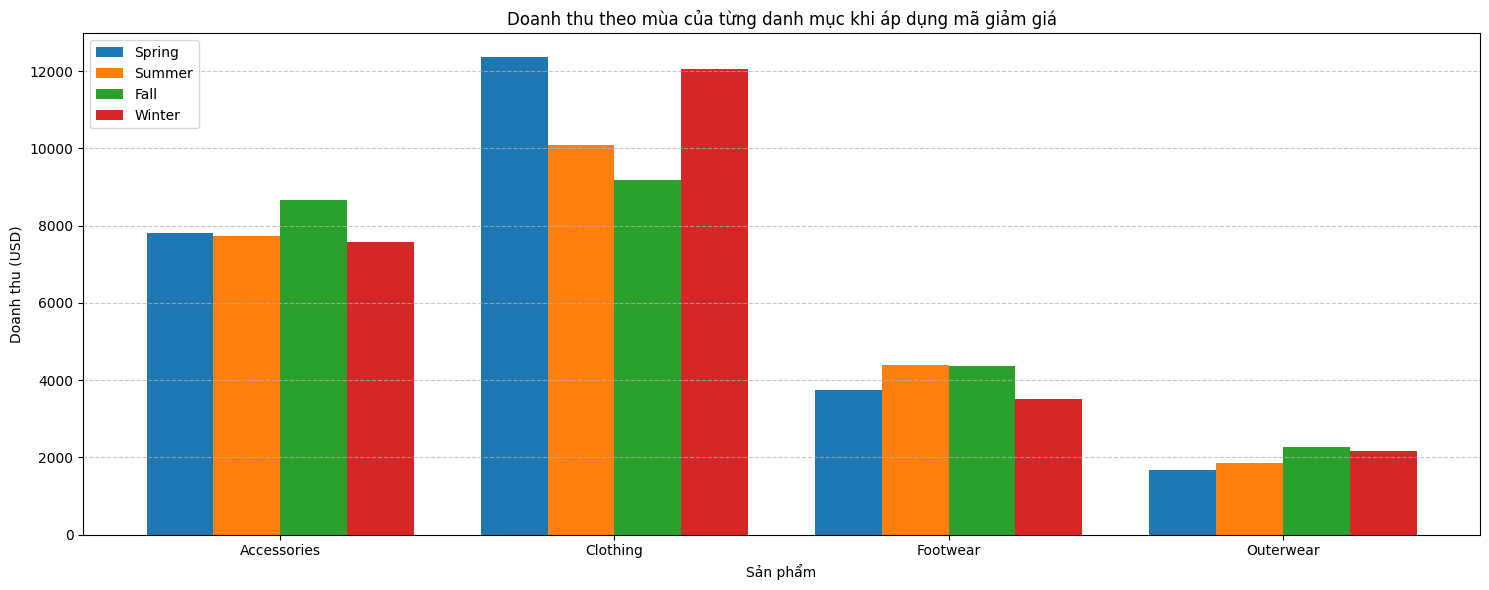

In [ ]:
revenue = df.groupby(['Category', 'Discount Applied', 'Season'])['Purchase Amount (USD)'].sum().reset_index()
customer_count = df.groupby(['Category', 'Discount Applied', 'Season'])['Customer ID'].count().reset_index()

revenue['Season'] = pd.Categorical(
    revenue['Season'],
    ['Spring', 'Summer', 'Fall', 'Winter'],
    ordered = True
)
customer_count['Season'] = pd.Categorical(
    customer_count['Season'],
    ['Spring', 'Summer', 'Fall', 'Winter'],
    ordered = True
)
revenue = revenue.sort_values(['Category', 'Season']).reset_index(drop = 1)
customer_count = customer_count.sort_values(['Category', 'Season']).rename(columns = {'Customer ID': 'Customer Count'}).reset_index(drop = 1)

product_categories = df['Category'].sort_values().unique()
x = np.arange(len(product_categories))

# Width of each bar
width = 0.2

# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, revenue[(revenue['Season'] == 'Spring') & (revenue['Discount Applied'] == 'Yes')]['Purchase Amount (USD)'], width, label = 'Spring')
ax.bar(x - width / 2, revenue[(revenue['Season'] == 'Summer') & (revenue['Discount Applied'] == 'Yes')]['Purchase Amount (USD)'], width, label = 'Summer')
ax.bar(x + width / 2, revenue[(revenue['Season'] == 'Fall') & (revenue['Discount Applied'] == 'Yes')]['Purchase Amount (USD)'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, revenue[(revenue['Season'] == 'Winter') & (revenue['Discount Applied'] == 'Yes')]['Purchase Amount (USD)'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(product_categories)
ax.set_xlabel('Danh mục sản phẩm')
ax.set_ylabel('Doanh thu (USD)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Doanh thu theo mùa của từng danh mục khi áp dụng mã giảm giá')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

#### Biểu đồ cột (Bar chart)
- Trục tung (y-axis): Hiển thị tên của từng danh mục sản phẩm.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng danh mục theo mùa, mỗi mùa được phân biệt bằng 1 màu khác nhau.

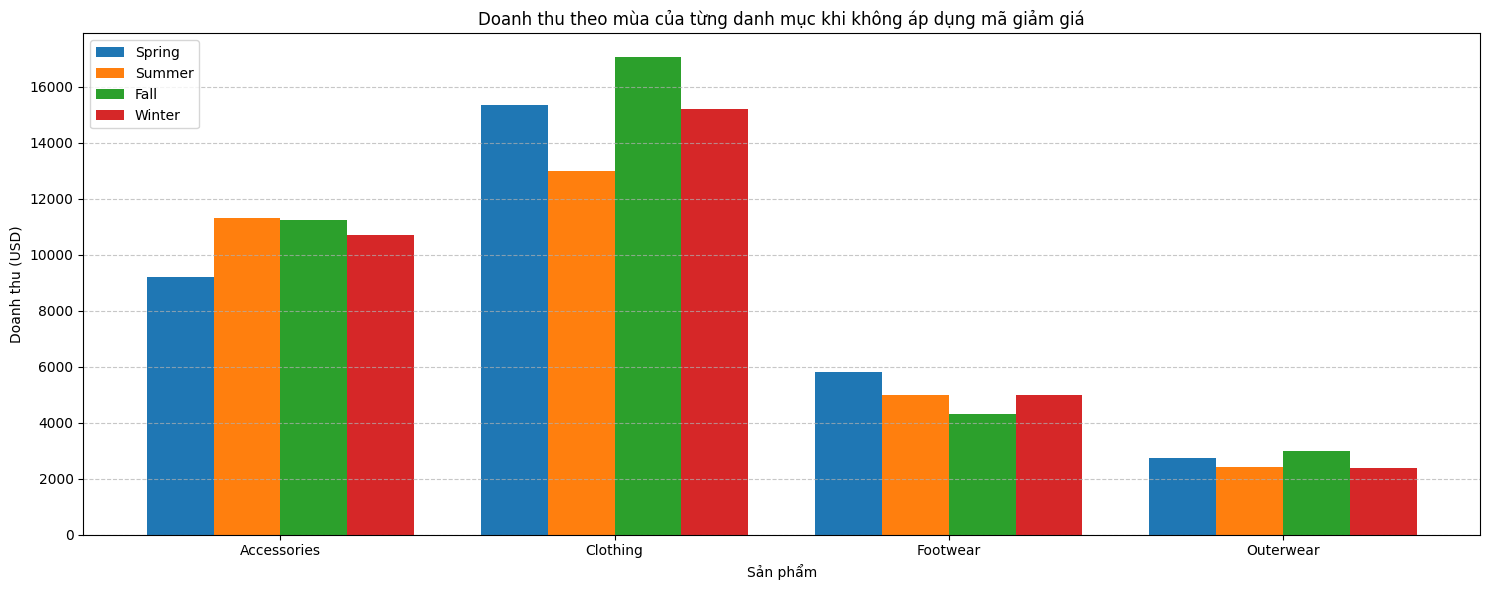

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, revenue[(revenue['Season'] == 'Spring') & (revenue['Discount Applied'] == 'No')]['Purchase Amount (USD)'], width, label = 'Spring')
ax.bar(x - width / 2, revenue[(revenue['Season'] == 'Summer') & (revenue['Discount Applied'] == 'No')]['Purchase Amount (USD)'], width, label = 'Summer')
ax.bar(x + width / 2, revenue[(revenue['Season'] == 'Fall') & (revenue['Discount Applied'] == 'No')]['Purchase Amount (USD)'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, revenue[(revenue['Season'] == 'Winter') & (revenue['Discount Applied'] == 'No')]['Purchase Amount (USD)'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(product_categories)
ax.set_xlabel('Danh mục sản phẩm')
ax.set_ylabel('Doanh thu (USD)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Doanh thu theo mùa của từng danh mục khi không áp dụng mã giảm giá')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

#### Biểu đồ cột (Bar chart)
- Trục tung (y-axis): Hiển thị tên của từng danh mục sản phẩm.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng danh mục theo mùa, mỗi mùa được phân biệt bằng 1 màu khác nhau.

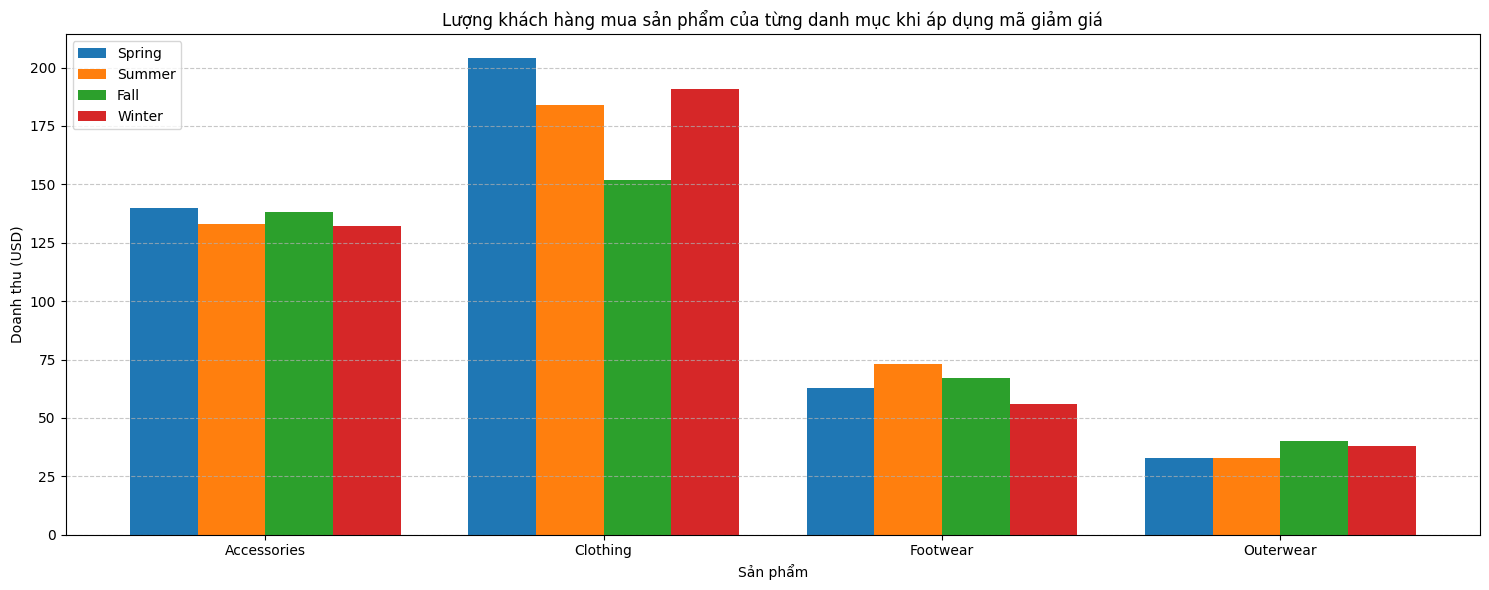

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, customer_count[(customer_count['Season'] == 'Spring') & (customer_count['Discount Applied'] == 'Yes')]['Customer Count'], width, label = 'Spring')
ax.bar(x - width / 2, customer_count[(customer_count['Season'] == 'Summer') & (customer_count['Discount Applied'] == 'Yes')]['Customer Count'], width, label = 'Summer')
ax.bar(x + width / 2, customer_count[(customer_count['Season'] == 'Fall') & (customer_count['Discount Applied'] == 'Yes')]['Customer Count'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, customer_count[(customer_count['Season'] == 'Winter') & (customer_count['Discount Applied'] == 'Yes')]['Customer Count'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(product_categories)
ax.set_xlabel('Danh mục sản phẩm')
ax.set_ylabel('Số lượng khách hàng (người)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Lượng khách hàng mua sản phẩm của từng danh mục khi áp dụng mã giảm giá')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

#### Biểu đồ cột (Bar chart)
- Trục tung (y-axis): Hiển thị tên của từng danh mục sản phẩm.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng danh mục theo mùa, mỗi mùa được phân biệt bằng 1 màu khác nhau.

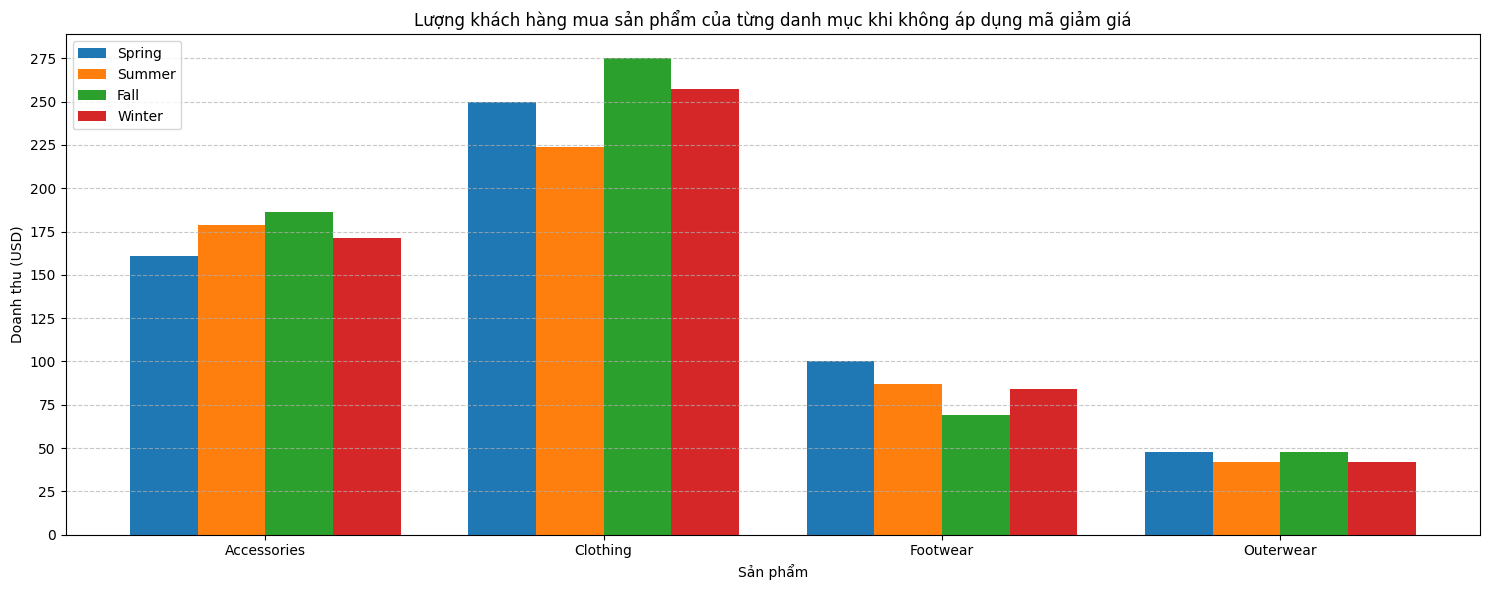

In [ ]:
# Create the figure and axes
fig, ax = plt.subplots(figsize = (15, 6))

# Plot each set of bars with different offsets
ax.bar(x - 3 * width / 2, customer_count[(customer_count['Season'] == 'Spring') & (customer_count['Discount Applied'] == 'No')]['Customer Count'], width, label = 'Spring')
ax.bar(x - width / 2, customer_count[(customer_count['Season'] == 'Summer') & (customer_count['Discount Applied'] == 'No')]['Customer Count'], width, label = 'Summer')
ax.bar(x + width / 2, customer_count[(customer_count['Season'] == 'Fall') & (customer_count['Discount Applied'] == 'No')]['Customer Count'], width, label = 'Fall')
ax.bar(x + 3 * width / 2, customer_count[(customer_count['Season'] == 'Winter') & (customer_count['Discount Applied'] == 'No')]['Customer Count'], width, label = 'Winter')

# Customize the x-axis
ax.set_xticks(x)
ax.set_xticklabels(product_categories)
ax.set_yticks(np.arange(0, 300, 25))
ax.set_xlabel('Danh mục sản phẩm')
ax.set_ylabel('Số lượng khách hàng (người)')
ax.grid(axis = 'y', linestyle = '--', alpha = 0.7)
ax.set_title('Lượng khách hàng mua sản phẩm của từng danh mục khi không áp dụng mã giảm giá')
ax.legend(loc = 'upper left')

plt.tight_layout()
plt.show()

#### Biểu đồ cột (Bar chart)
- Trục tung (y-axis): Hiển thị tên của từng danh mục sản phẩm.
- Trục hoành (x-axis): Hiển thị doanh thu của từng sản phẩm, đơn vị là USD.
- Các cột: Chiều dài của mỗi cột thể hiện giá trị doanh thu tương ứng của từng danh mục theo mùa, mỗi mùa được phân biệt bằng 1 màu khác nhau.

### Nhận xét các biểu đồ
Với hai biểu đồ về doanh thu, ta có thể thấy doanh thu của cửa hàng từ lượng khách áp dụng mã giảm giá để mua sắm ít hơn so với doanh thu từ lượng khách không áp dụng mã giảm giá để mua sắm. Với hai biểu đồ về lượng khách hàng, ta có thể thấy lượng khách áp dụng mã giảm giá để mua sắm ít hơn so với lượng khách không áp dụng mã giảm giá để mua sắm.

Hai điều trên cho thấy việc giảm giá chưa thật sự được phổ biến đến nhiều người mua.

... (Có dự tính dùng Scatter plot để khảo sát doanh thu trên đầu người theo từng danh mục sản phẩm?)